# Introduction to the Demograpic Inference

## Workshop Outline
1. Basics of using Jupyter Notebooks
2. Basics of the SFS
3. Our Dataset
4. Overview of `easySFS`
5. Example Run of `easySFS`
6. Overview of GADMA
7. Example Run of GADMA
8. Evaluate Confidence Intervals (CI) for the Final Model
9. Overview of GONE
10. Example Run of GONE

## Getting Help after Workshop
- Contact: [enoskova.me](http://enoskova.me)
- Feel free to send me email
- [Getting help for GADMA](https://github.com/ctlab/GADMA#getting-help)

----------
## 1. Basics of using Jupyter Notebooks

Jupyter Notebooks have cells where you can write in Markdown and run code.
To execute a cell, click the run button or press shift enter.

In [1]:
print('Try writing some Python here')

Try writing some Python here


In [11]:
%%bash
echo 'We can also use Bash magic. Try writing some Bash here'

We can also use Bash magic. Try writing some Bash here


We want to see pictures in this notebook, for that we need:

In [17]:
%matplotlib inline

------
## 2. Basics of the SFS

### What is the SFS?

Site frequency spectrum or allele frequency spectrum is a joint distribution of allele frequencies among population.

- One population. SFS is vector $S$ of values, Entry $S[i]$ contains number of positions where derived allele occured in $i$ hyplotype samples.
<div>
<img src="pictures/1d_plot.png" width="300" align="left" />
</div>

- Two populations. SFS is a 2-dimentional matrix where entry $S[i, j]$ corresponds to the number of positions where the derived alleles occured in $i$ haplotype samples in population 1 and in $j$ haplotype samples in population 2.
<div>
<img src="pictures/2d_plot.png" width="250" align="left" />
</div>

- $P$ populations. SFS is a $P$-dimentional tensor. Example for three populations:
<div>
<img src="pictures/3d_plot.png" width="300" align="left" />
</div>

### Ignore monomorphic bins

SFS bin that corresponds to the frequency 0 per population contains number of monomorphic positions with the ancestral allele. Some tools (`dadi`, `moments`, `momi2`) ignore that value as it could be easily evaluated from total sequence length and other values of SFS.

For almost the same reason the bin with maximum frequency per population is excluded from the analisys. The number of sites with fixed derived allele is relatively small and, moreover, could be a consequence of false ancestral allele identification.

On the plots above both monomorphic bins are excluded. The monomorphic bin with 0 frequency is usually very high as most sites are monomorphic, and, thus, including it to the plot will lead to the severe disproportions of other bins.

### What data do we need to build the accurate SFS?

Site frequency spectrum reflects the history of individuals, however, it is important to build it accurately. Some recommendations to keep in mind:

- VCF format file of filtered genotypes
- As many SNP's as possible
- As many individuals as possible (8-10 okay, 100 better)
- No relatives
- Avoid missing data (`easySFS` could help with missing data)
- Coordinates of neutral sites or intergenic regions (similar evolution forces)

### What if we do not know the derived allele? (SFS folding)

Sometimes outgroup information is missed. In that case we can use minor allele frequencies (MAF) to build our SFS. The MAF SFS can be easily built from the usual SFS. This process is called *folding* and MAF SFS is called *folded SFS*.

- Example of the SFS folding in case of one population:

    Unfolded and folded SFS correspondingly:

    <img src="pictures/1d_plot_before_folding.png" width="300" align="left"/>
    <img src="pictures/1d_plot_after_folding.png" width="300" align="left"/>

- Example of the SFS folding in case of two populations:

    Unfolded and folded SFS correspondingly:
    
    <img src="pictures/2d_plot_before_folding.png" width="250" align="left"/>
    <img src="pictures/2d_plot_after_folding.png" width="250" align="left"/>

## 3.  Our Dataset

We have a dataset for clouded leopards (*Neofelis nebulosa*). We have **autosome** data for 5 diploid individuals (10 samples).

All the data is available in the `data` folder:

In [20]:
%%bash
ls data

boots
chrommap
clouded_leopard_data.vcf
popmap


- File `data/clouded_leopard_data.vcf` is our VCF file for all 5 individuals (X chromosome is excluded):

In [21]:
%%bash
# First five lines
head -5 data/clouded_leopard_data.vcf

##fileformat=VCFv4.2
##bcftools_viewCommand=view -f PASS -Oz -o /home/anna/Desktop/clouded_leopards/vcf/filt/NN114296_HD_PASS.vcf.gz /home/anna/Desktop/clouded_leopards/vcf/filt/NN114296_HD.vcf.gz; Date=Thu Mar  9 13:25:00 2023
##bcftools_filterCommand=filter --threads 2 -Oz -i FORMAT/DP>=5 -o /home/anna/Desktop/clouded_leopards/vcf/filt/NN114296_HD_PASS_DP5.vcf.gz /home/anna/Desktop/clouded_leopards/vcf/filt/NN114296_HD_PASS.vcf.gz; Date=Thu Mar  9 13:25:27 2023
##bcftools_viewCommand=view -f PASS -Oz -o /home/anna/Desktop/clouded_leopards/vcf/filt/NN114297_HD_PASS.vcf.gz /home/anna/Desktop/clouded_leopards/vcf/filt/NN114297_HD.vcf.gz; Date=Thu Mar  9 13:25:00 2023
##bcftools_filterCommand=filter --threads 2 -Oz -i FORMAT/DP>=5 -o /home/anna/Desktop/clouded_leopards/vcf/filt/NN114297_HD_PASS_DP5.vcf.gz /home/anna/Desktop/clouded_leopards/vcf/filt/NN114297_HD_PASS.vcf.gz; Date=Thu Mar  9 13:25:27 2023


In [22]:
%%bash
# Our schromosomes
head -57 data/clouded_leopard_data.vcf | tail -18

##contig=<ID=CM051599.1,length=243997075>
##contig=<ID=CM051600.1,length=222427791>
##contig=<ID=CM051601.1,length=207471084>
##contig=<ID=CM051602.1,length=170163164>
##contig=<ID=CM051603.1,length=159605645>
##contig=<ID=CM051604.1,length=156028032>
##contig=<ID=CM051605.1,length=150204169>
##contig=<ID=CM051606.1,length=142999991>
##contig=<ID=CM051607.1,length=141813369>
##contig=<ID=CM051608.1,length=115744418>
##contig=<ID=CM051609.1,length=95678116>
##contig=<ID=CM051610.1,length=95590950>
##contig=<ID=CM051611.1,length=92698642>
##contig=<ID=CM051612.1,length=83647936>
##contig=<ID=CM051613.1,length=75977291>
##contig=<ID=CM051614.1,length=66162313>
##contig=<ID=CM051615.1,length=62726519>
##contig=<ID=CM051616.1,length=46369777>


In [23]:
%%bash
# The header line of the VCF file (we take first 84 lines of file and then show the last one)
head -68 data/clouded_leopard_data.vcf | tail -1

#CHROM	POS	ID	REF	ALT	QUAL	FILTER	INFO	FORMAT	NN114296	NN114297	NN114393	NN115950	NN190240


- File `data/popmap` provides population assignments per individual (all our individuals are from the same population that is marked as `NN`):

In [109]:
%%bash
cat data/popmap

NN114296	NN
NN114297	NN
NN114393	NN
NN115950	NN
NN190240	NN


- File `data/chrommap` assigns chromosome number for each scaffold name from VCF.

In [110]:
%%bash
cat data/chrommap

CM051599.1 1
CM051600.1 2
CM051601.1 3
CM051602.1 4
CM051603.1 5
CM051604.1 6
CM051605.1 7
CM051606.1 8
CM051607.1 9
CM051608.1 10
CM051609.1 11
CM051610.1 12
CM051611.1 13
CM051612.1 14
CM051613.1 15
CM051614.1 16
CM051615.1 17
CM051616.1 18


- The length of the given sequence is equal to $2{,}329{,}306{,}282$ bp.

We will also use the following values associated with our species of interest [\[Bursell et al. 2022\]](https://doi.org/10.1016/j.isci.2022.105647):
- Generation time 7 years
- Mutation rate of $2.22 \times 10^{-9}$ per base pair per year = $1.554 \times 10^{-8}$ per base pair per **generation**
- Recombination rate of $1$ cM/Mb

-----
## 4. Overview of `easySFS`

### What is [easySFS](https://github.com/isaacovercast/easySFS#install--run)?
- A tool for SFS construction from the VCF file.
- Generates SFS in several formats: `dadi`/`fastsimcoal2`/`momi2` (GADMA accepts all of them)
- Provides means to project SFS down to account for missed data.
- Allows to focus SFS on the independent SNP's (for RADSeq-like data only!)

(Unfortunately, no paper to cite, however, authors ask to credit [\[Gutenkunst et al. 2009\]](https://doi.org/10.1371/journal.pgen.1000695))

### What is the SFS projection?
Assume we have two different datasets with different numbers of samples. We construct two SFS and want to compare them, but they are of different size. SFS is a histogram of allele frequencies and it is possible to downsize or project it. Thus, we could downsize both spectra to some smaller size and compare them.

### Some intuition about SFS projection

Let us get some intuition about how to use information from the bigger SFS for its projection.

Assume we have the following data ($A$ stands for ancestral allele and $T$ for derived allele):

- Sample 1: $A\ A\ A\ T\ A$
- Sample 2: $A\ A\ T\ A\ A$
- Sample 3: $A\ A\ T\ T\ \ .$
- Sample 4: $T\ A\ T\ A\ A$

and we want to build projection of the SFS on three samples.

We can see that the derived allele has frequency of $1/4$ (one out of four) among four samples on the first position.
Let us subsample three individuals from given four samples and compute the frequency of derived allele on the first position. We can choose samples 1, 2, 3 and obtain $0/3$ frequency (with probability $p_1$) or we can obtain frequency of $1/3$ by choosing sample 4 and any other two samples (with probability $p_2$).

Thus, for our SFS projection we can put value equal to $p_1$ in the $0/3$ bin and value of $p_2$ in the $1/3$ bin.

The third position has derived allele frequency of $3/4$. We can obtain frequency of $3/3$ by choosing samples 2, 3, 4 and frequency of $2/3$ by choosing sample 1 and any other two samples.

Having the probabilities of each subsampling frequency (see [hypergeometric distribution](https://en.wikipedia.org/wiki/Hypergeometric_distribution)) we can build new SFS with smaller size.

### Accounting for the missed data

SFS projection can easy account for missed information! For the last position in our example data we just add $1$ to the frequency $0/3$ of the projected SFS. That is exactly what `easySFS` does.


--------
## 5. Example Run of `easySFS`

### Installation

Resources: [more information about installation of easySFS](https://github.com/isaacovercast/easySFS#install--run)

Download `easySFS` from GitHub repo:

In [113]:
%%bash
git clone https://github.com/isaacovercast/easySFS.git
ls easySFS

fatal: destination path 'easySFS' already exists and is not an empty directory.


easySFS.py
example_files
jupyter-notebooks
__pycache__
README.md
Spectrum.py


### Run `easySFS` with the `--help` option

In [111]:
%%bash
./easySFS/easySFS.py --help

usage: easySFS.py [-h] -i VCF_NAME -p POPULATIONS [-o OUTDIR]
                  [--proj PROJECTIONS] [--preview] [--ploidy PLOIDY]
                  [--prefix PREFIX] [--unfolded] [--order POP_ORDER]
                  [--dtype DTYPE] [--GQ GQUAL] [--total-length TOTAL_LENGTH]
                  [--window-bp WINDOW_BP] [--window-snp WINDOW_SNP] [-a] [-f]
                  [-v]

optional arguments:
  -h, --help            show this help message and exit
  -i VCF_NAME           name of the VCF input file being converted
  -p POPULATIONS        Input file containing population assignments per
                        individual
  -o OUTDIR             Directory to write output SFS to
  --proj PROJECTIONS    List of values for projecting populations down to
                        different sample sizes
  --preview             Preview the number of segragating sites per population
                        for different projection values.
  --ploidy PLOIDY       Specify ploidy. Default is 2. On

### Run `easySFS` for your VCF file with `--preview` option

In [25]:
%%bash
#./easySFS/easySFS.py -i data/clouded_leopard_data.vcf -p data/popmap -a --preview > outputs/easySFS_preview_output
cat outputs/easySFS_preview_output


  Processing 1 populations - ['NN']

    Running preview mode. We will print out the results for # of segregating sites
    for multiple values of projecting down for each population. The dadi
    manual recommends maximizing the # of seg sites for projections, but also
    a balance must be struck between # of seg sites and sample size.

    For each population you should choose the value of the projection that looks
    best and then rerun easySFS with the `--proj` flag.
    
NN
(2, 2747541)	(3, 2336883)	(4, 2607723)	(5, 1717122)	(6, 1789046)	(7, 1100559)	(8, 1134274)	(9, 513161)	(10, 527501)	



#### Visualize the results of the preview
In this notebook we will use python:

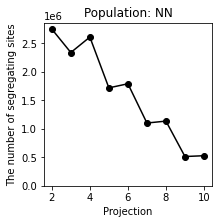

In [117]:
from scripts.draw_easySFS_preview import draw_easySFS_preview
draw_easySFS_preview("outputs/easySFS_preview_output")

Moreover, one can run script from command line the following way (the same picture will appear if you use it from command line interface):

In [115]:
%%bash
python scripts/draw_easySFS_preview.py outputs/easySFS_preview_output

Figure(300x300)


### Run easySFS for your VCF file with `--proj` option

In [119]:
%%bash
#./easySFS/easySFS.py -i data/clouded_leopard_data.vcf -p data/popmap -a --total-length 2329306282 -o outputs/easySFS_output -f --proj 10 

## easySFS output
EasySFS with `--proj` option generates SFS for a given data in several formats:
- `dadi` - input format of dadi, moments,
- `fastsimcoal2` - input format of fastsimcoal2,
- `momi` - input format of momi2 (only if we use full projections, i.e. do not project SFS down).

GADMA can work with any input format mentioned above.

In [26]:
%%bash
ls outputs/easySFS_output

dadi
fastsimcoal2


In [27]:
%%bash
ls outputs/easySFS_output/dadi

NN-10.sfs
NN.sfs


In [28]:
%%bash
cat outputs/easySFS_output/dadi/NN-10.sfs

11 folded "NN"
2328778781 143404 127015 111239 94864 50979 0 0 0 0 0
1 0 0 0 0 0 1 1 1 1 1


In [29]:
%%bash
cat outputs/easySFS_output/fastsimcoal2/NN_MAFpop0.obs

1 observation
d0_0	d0_1	d0_2	d0_3	d0_4	d0_5	d0_6	d0_7	d0_8	d0_9	d0_10
2328778781 143404 127015 111239 94864 50979 0 0 0 0 0



## Picture of our SFS

In this example we will use SFS `output/dadi/NN.sfs` generated for dadi. Let us draw the picture:

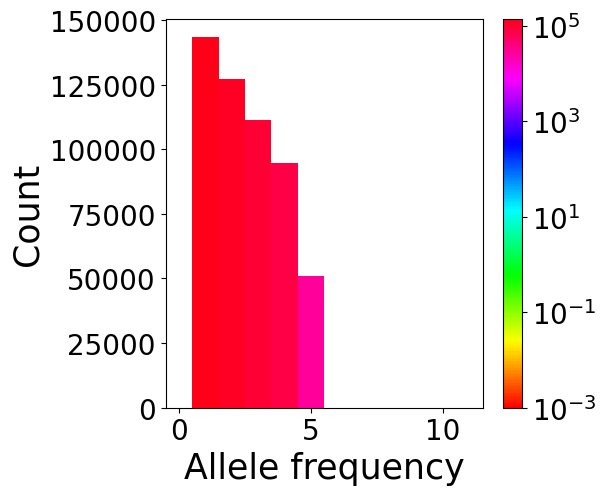

In [1]:
from scripts.draw_sfs import draw_1d_sfs
draw_1d_sfs("outputs/easySFS_output/dadi/NN-10.sfs")

-----
## 6. Overview of GADMA

### What is [GADMA](https://github.com/ctlab/GADMA)?
- Tool for demographic inference from the genetic data.
- Provides demographic history that has highest value of likelihood with the data.
- Includes several likelihood components of existing tools under the common interface (`dadi`, `moments`, `momi2`, `momentsLD`)
- Has effective global optimization for parameter search.
- New model specification using *structure*.
- Repeats demographic inference and provides best result among several repeats (30 repeats is good, 100 is better).

Papers to cite: [\[Noskova et al. 2020\]](https://doi.org/10.1093/gigascience/giaa005), [\[Noskova et al. 2023\]](https://doi.org/10.1101/2022.06.14.496083) and other papers regarding used engines (see more [here](https://gadma.readthedocs.io/en/latest/citations.html)). 

### What is the difference between likelihood engines in GADMA?

GADMA has several engines to evaluate likelihood of the demographic history and data. More information about each engine could be found in the [documentation](https://gadma.readthedocs.io/en/latest/user_manual/set_engine.html).

<img src="pictures/Screenshot_engines.png" width="700" align="left"/>

### What is the model of the demographic history?

Classical tools for demographic inference require parameterized model of the demographic history. It should be specified using interface of the tool and could be error-prone. For example, let us consider the following model for the demographic history of two populations:
- Ancestral population had size equal to $N_{anc}$.
- Ancestral population experienced instanstenious growth up to ($nu_{1F}\cdot N_{anc}$) individuals and it has constant size for ($2\cdot T_p\cdot N_{anc}$) generations.
- Then second population diverged from ancestral population.
- Second population experienced exponential growth from ($nu_{2B}\cdot N_{anc}$) up to ($nu_{2F}\cdot N_{anc}$) individuals during ($2\cdot T\cdot N_{anc}$) generations after split.
- Size of the first population was equal to the size of ancestral population.
- There was migration between populations with rate equal to $m / (2\cdot N_{anc})$ migrants per generation.

This model has one parameter for $N_{anc}$ and additional 6 parameters. Example of the model specification for `dadi` using its Python API:

In [ ]:
def prior_onegrow_mig(params, ns, pts):
    """
    Model with growth, split, bottleneck in pop2, exp recovery, migration

    params list is
    nu1F: The ancestral population size after growth. (Its initial size is
          defined to be 1.)
    nu2B: The bottleneck size for pop2
    nu2F: The final size for pop2
    m: The scaled migration rate
    Tp: The scaled time between ancestral population growth and the split.
    T: The time between the split and present

    ns = (n1,n2): Size of fs to generate.
    pts: Number of points to use in grid for evaluation.
    """
    nu1F, nu2B, nu2F, m, Tp, T = params
    n1,n2 = ns
    # Define the grid we'll use
    xx = yy = dadi.Numerics.default_grid(pts)

    # phi for the equilibrium ancestral population
    phi = dadi.PhiManip.phi_1D(xx)
    # Now do the population growth event.
    phi = dadi.Integration.one_pop(phi, xx, Tp, nu=nu1F)

    # The divergence
    phi = dadi.PhiManip.phi_1D_to_2D(xx, phi)
    # We need to define a function to describe the non-constant population 2
    # size. lambda is a convenient way to do so.
    nu2_func = lambda t: nu2B*(nu2F/nu2B)**(t/T)
    phi = dadi.Integration.two_pops(phi, xx, T, nu1=nu1F, nu2=nu2_func, 
                                    m12=m, m21=m)

    # Finally, calculate the spectrum.
    sfs = dadi.Spectrum.from_phi(phi, (n1,n2), (xx,yy))
    return sfs

### Model specification using structure

GADMA requieres number of epochs in the demographic history. It has several additional handlers for flexibility:
- Enable/disable migrations
- Enable/disable selection
- Enable/disable dynamics of population size

More information [here](https://gadma.readthedocs.io/en/latest/user_manual/set_model/set_model_struct.html).

<img src="pictures/gadma.png" width="700" align="left"/>

### Dynamics of population size change

GADMA has flexible dynamics of population size change for model with structure.

Population dynamic can be:

- Constant (Sudden)
- Linear
- Exponential

<img src="pictures/sudden.png" width="150" align="left"/>
<img src="pictures/linear.png" width="150" align="left"/> 
<img src="pictures/exponential.png" width="150" align="left"/>

### Notes about structure

- Structure model could be used only for data of either 1, 2 or 3 populations. For 4 and 5 populations usual models could be used (custom models).
- Structure should not be very complex: \[3\] for one population, \[2, 1\] for two populations and \[2, 1, 1\] for three populations is enough.
- For three populations the most ancient population should be specified (in order to know the tree topology). It could be just sorted through all options.
- GADMA has a special inference scheme when the structure is increased: it starts from the simple initial structure and then use more complex structures until reachs the final one. Please, use this option as it provides better estimations.


--------
## 7. Example Run of GADMA

### Installation

[Documentation on installation](https://gadma.readthedocs.io/en/latest/user_manual/installation.html#installing-the-latest-release)

GADMA can be easily installed via `pip` or `conda`. Some of its engines should be installed manually (e.g. `moments`).



In [2]:
%%bash
pip install pandas
pip install demes
pip install demesdraw
pip install gadma
pip install git+https://bitbucket.org/simongravel/moments.git
pip install numpy==1.22.4  # Sorry, not all numpy versions work for GADMA
pip install matplotlib==3.5.3 # The best version of matplotlib for gadma

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


Defaulting to user installation because normal site-packages is not writeable
  Cloning https://bitbucket.org/simongravel/moments.git to /tmp/pip-req-build-azgy9rf7


  Running command git clone --filter=blob:none -q https://bitbucket.org/simongravel/moments.git /tmp/pip-req-build-azgy9rf7


  Resolved https://bitbucket.org/simongravel/moments.git to commit 3b1154e70d647d2025b130c70016e625e0e25316
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing wheel metadata (pyproject.toml): started
  Preparing wheel metadata (pyproject.toml): finished with status 'done'


### Run GADMA with the `--help` option

In [5]:
%%bash
gadma --help

GADMA version 2.0.0rc25.dev0	by Ekaterina Noskova (ekaterina.e.noskova@gmail.com)
Usage: 
	gadma	-p/--params	<params_file>
		-e/--extra	<extra_params_file>


Instead/With -p/--params and -e/--extra option you can set:
	-o/--output	<output_dir>		output directory.
	-i/--input	<in.fs>/<in.txt>/	input data for demographic inference
			<in.vcf>,<popmap>	(AFS, dadi format or VCF).
	--resume	<resume_dir>		resume another launch from <resume_dir>.
	--only_models		flag to take models only from another
				launch (--resume option).

	-h/--help		show this help message and exit.
	-v/--version		show version and exit.
	--test			run test case.

In case of any questions or problems, please contact: ekaterina.e.noskova@gmail.com


### GADMA output

[More information about GADMA output in the documentation](https://gadma.readthedocs.io/en/latest/user_manual/output.html)

Before we run GADMA let us take a look at its output. GADMA was already run and it created an output directory.
- Our run was saved in `outputs/gadma_outputs/gadma_example_output`:

In [191]:
%%bash
ls outputs/gadma_outputs/gadma_full_example_run/

1
2
3
4
5
6
7
8
best_claic_model_dadi_code.py
best_claic_model_demes_code.py.yml
best_claic_model_moments_code.py
best_claic_model_momi2_code.py
best_claic_model.png
best_logLL_model_dadi_code.py
best_logLL_model_demes_code.py.yml
best_logLL_model_moments_code.py
best_logLL_model_momi2_code.py
best_logLL_model.png
extra_params_file
GADMA.log
params_file


- All command line output is saved in file `GADMA.log`:

In [192]:
%%bash
head -17 outputs/gadma_outputs/gadma_full_example_run/GADMA.log

Data reading
Number of populations: 1
Projections: [10]
Population labels: ['NN']
Outgroup: False
--Successful data reading--

--Successful arguments parsing--

Bootstrap data reading
Number of files found: 20
--Successful bootstrap data reading--

Parameters of launch are saved in output directory: /home/enoskova/Workspace/GADMA_workshop/outputs/gadma_outputs/gadma_full_example_run/params_file
All output is saved in output directory: /home/enoskova/Workspace/GADMA_workshop/outputs/gadma_outputs/gadma_full_example_run/GADMA.log

--Start pipeline--


In [196]:
%%bash
tail -63 outputs/gadma_outputs/gadma_full_example_run/GADMA.log


[000:04:10]
All best by log-likelihood models
Number	log-likelihood	Model
Run 3	-438.95	 [Nanc = 1762] [ [ 28569.437(t1), [1764.727(nu11)], [Sud(dyn11)] ],	[ 13.057(t2), [0.534(nu21)], [Exp(dyn21)] ] ]	f	(theta =  255258.81)
Run 2	-439.07	 [Nanc = 1762] [ [ 12.924(t1), [0.531(nu11)], [Exp(dyn11)] ] ]	(theta =  255155.88)
Run 7	-439.49	 [Nanc = 1764] [ [ 1.994(t1), [1.32(nu11)], [Sud(dyn11)] ],	[ 1.982(t2), [1.32(nu21)], [Sud(dyn21)] ] ]	f	(theta =  255439.98)
Run 1	-439.55	 [Nanc = 1764] [ [ 0.443(t1), [1764.31(nu11)], [Lin(dyn11)] ],	[ 27.982(t2), [1.278(nu21)], [Exp(dyn21)] ] ]	f	(theta =  255453.83)
Run 8	-439.80	 [Nanc = 1765] [ [ 12.796(t1), [215.823(nu11)], [Sud(dyn11)] ],	[ 88.237(t2), [0.136(nu21)], [Lin(dyn21)] ] ]	f	(theta =  255579.40)
Run 5	-439.91	 [Nanc = 1763] [ [ 1.54e-04(t1), [1763.902(nu11)], [Sud(dyn11)] ],	[ 36.103(t2), [1.718(nu21)], [Exp(dyn21)] ] ]	f	(theta =  255394.77)
Run 4	-440.59	 [Nanc = 1765] [ [ 4.84e-08(t1), [23.607(nu11)], [Lin(dyn11)] ],	[ 19.895(t2),

- Picture of the final history is saved in `outputs/gadma_outputs/gadma_example_output/best_logLL_model.png`

<img src="outputs/gadma_outputs/gadma_full_example_run/best_logLL_model.png" width="900" align="left"/>

- GADMA uses parameters file with specified options. Example of parameters file could be found [here](https://gadma.readthedocs.io/en/latest/user_manual/example_params_file.html).

In [134]:
%%bash
cat outputs/gadma_outputs/gadma_example_output/params_file

#    It is a parameters file for GADMA software.

#    Lines started from # are ignored.
#    Also comments at the end of a line are ignored too.
#    Every line contains: Identificator of parameter : value.

#!!!     means pay attention to this parameter, they are primary.

#!!!
#    Output directory to write all GADMA out.
#    One need to set it to a missing or empty directory.
#    If it is resumed from other directory and output directory 
#    isn't set, GADMA will add '_resumed' for previous output 
#    directory.
Output directory: /home/enoskova/Workspace/GADMA_workshop/gadma_output


#!!!
#    Input data can be sfs file (should end with .fs) or 
#    file of SNP's in dadi format (should end with .txt) or
#   VCF file + popmap file (sample population map).
Input data: /home/enoskova/Workspace/GADMA_workshop/easySFS_output/dadi/NN-10.sfs

#    'Population labels' is sequence of population names (the same
#    names as in input file)
#    If .fs file is in old format then it wou

#    (Note: is implemented in moments: one need to have moments 
#    installed.)
#
#    (If optimizations are often hitting the parameter bounds, 
#    try using these methods:)
#    *    optimize_lbfgsb
#    *    optimize_log_lbfgsb 
#    (Note that it is probably best to start with the vanilla BFGS 
#    methods, because the L-BFGS-B methods will always try parameter
#    values at the bounds during the search. 
#    This can dramatically slow model fitting.)
#
#    *    optimize_log_fmin (simplex (a.k.a. amoeba) method)
#    
#    *    hill_climbing
#    
#    Default: optimize_powell
Local optimizer: BFGS_log



#    Parameters of pipeline
#
#    One can automatically generate dadi and moments code for models.
#    If 0 then only current best model will be printed in GA's 
#    working directory.
#    Also the result model will be saved there. 
#    If specified (not 0) then every N iteration model will be saved
#    in python code folder.
#    Default: 0
Print models' code every 

- Each repeat of GADMA run is saved in its own folder:

In [135]:
%%bash
ls outputs/gadma_outputs/gadma_example_output/1

current_best_logLL_model_dadi_code.py
current_best_logLL_model_demes_code.py.yml
current_best_logLL_model_moments_code.py
current_best_logLL_model_momi2_code.py
eval_file
final_best_logLL_model_dadi_code.py
final_best_logLL_model_demes_code.py.yml
final_best_logLL_model_moments_code.py
final_best_logLL_model_momi2_code.py
final_best_logLL_model.png
GADMA_GA.log
save_file_1
save_file_2
save_file_3


### Run GADMA for one-epoch demographic history inference

Let us run GADMA for our data. We need to specify params_file for GADMA with options. We will use moments in our example, but you can choose either `dadi` or `momi2` as well (they are also SFS-based engines).

In [136]:
%%bash
cat gadma_params_files/gadma_params_file_1epoch

Input data: outputs/easySFS_output/dadi/NN-10.sfs
Output directory: outputs/gadma_outputs/gadma_output_1epoch

Mutation rate: 1.554e-8
Sequence length: 2329306282

Engine: moments

# Those are default options:
# Initial structure: 1
# Final structure: 1

Number of repeats: 8
Number of processes: 4


In [7]:
%%bash
#rm -rf outputs/gadma_outputs/gadma_output_1epoch
gadma -p gadma_params_files/gadma_params_file_1epoch

Data reading
Number of populations: 1
Projections: [10]
Population labels: ['NN']
Outgroup: False
--Successful data reading--

--Successful arguments parsing--

Parameters of launch are saved in output directory: /home/jupyter-user_workshop/GADMA_workshops/SMSC_workshop/outputs/gadma_outputs/gadma_output_1epoch/params_file
All output is saved in output directory: /home/jupyter-user_workshop/GADMA_workshops/SMSC_workshop/outputs/gadma_outputs/gadma_output_1epoch/GADMA.log

--Start pipeline--
Run launch number 1
Run launch number 3
Run launch number 4
Run launch number 2


Finish genetic algorithm number 3
Finish genetic algorithm number 4
Run launch number 5
Run launch number 6


Finish genetic algorithm number 2
Run launch number 7


Finish genetic algorithm number 1
Run launch number 8


Finish genetic algorithm number 5


Finish genetic algorithm number 7


Finish genetic algorithm number 6
Finish genetic algorithm number 8

[000:00:10]
All best by log-likelihood models
Number	log-likelihood	Model
Run 1	-18152.06	 [Nanc = 1287] [  ]	f	(theta =  186464.09)
Run 3	-18152.06	 [Nanc = 1287] [  ]	f	(theta =  186464.09)
Run 4	-18152.06	 [Nanc = 1287] [  ]	f	(theta =  186464.09)
Run 2	-18152.06	 [Nanc = 1287] [  ]	f	(theta =  186464.09)
Run 6	-18152.06	 [Nanc = 1287] [  ]	f	(theta =  186464.09)
Run 5	-18152.06	 [Nanc = 1287] [  ]	f	(theta =  186464.09)
Run 7	-18152.06	 [Nanc = 1287] [  ]	f	(theta =  186464.09)
Run 8	-18152.06	 [Nanc = 1287] [  ]	f	(theta =  186464.09)


Run 1 warning: failed to generate  some code due to the following exception: momentsLD: 1287.827247677082, 1.0

You can find the picture of the best model in the output directory.


--Finish pipeline--

Thank you for using GADMA!

In case of any questions or problems, please contact: ekaterina.e.noskova@gmail.com



The last output was (it will be different if you rerun the cell above on your system):
```
[000:00:10]
All best by log-likelihood models
Number	log-likelihood	Model
Run 1	-18152.06	 [Nanc = 1287] [  ]	f	(theta =  186464.09)
```

The total run took ~10 seconds. The best history has the value of log-likehood equal to $-18152.06$. It was obtained by the repeat number 1 (`Run 1`). The history includes one epoch of constant size of 1,287 individuals.

Picture of the result demographic history (`outputs/gadma_outputs/gadma_output_1epoch/best_logLL_model.png` file):
<img src="outputs/gadma_outputs/gadma_output_1epoch/best_logLL_model.png" width="900" align="left"/>

### Run GADMA for two-epoch demographic history inference

In [9]:
%%bash
cat gadma_params_files/gadma_params_file_2epochs

Input data: outputs/easySFS_output/dadi/NN-10.sfs
Output directory: outputs/gadma_outputs/gadma_output_2epochs

Mutation rate: 1.554e-8
Sequence length: 2329306282

Engine: moments

Initial structure: 1
Final structure: 2

Number of repeats: 8
Number of processes: 4


In [10]:
%%bash
#rm -rf /home/enoskova/Workspace/GADMA_workshop/outputs/gadma_outputs/gadma_output_2epochs
gadma -p gadma_params_files/gadma_params_file_2epochs

Data reading
Number of populations: 1
Projections: [10]
Population labels: ['NN']
Outgroup: False
--Successful data reading--

--Successful arguments parsing--

Parameters of launch are saved in output directory: /home/jupyter-user_workshop/GADMA_workshops/SMSC_workshop/outputs/gadma_outputs/gadma_output_2epochs/params_file
All output is saved in output directory: /home/jupyter-user_workshop/GADMA_workshops/SMSC_workshop/outputs/gadma_outputs/gadma_output_2epochs/GADMA.log

--Start pipeline--
Run launch number 1
Run launch number 2
Run launch number 4
Run launch number 3



[000:01:00]
All best by log-likelihood models
Number	log-likelihood	Model
Run 4	-386.00	 [Nanc = 1764] [ [ 216.149(t1), [17.647(nu11)], [Lin(dyn11)] ] ]	m	(theta =  255512.55)
Run 1	-386.37	 [Nanc = 1769] [ [ 218.968(t1), [17.695(nu11)], [Lin(dyn11)] ] ]	m	(theta =  256212.30)
Run 3	-416.45	 [Nanc = 1762] [ [ 42.225(t1), [89.942(nu11)], [Sud(dyn11)] ] ]	m	(theta =  255239.30)
Run 2	-424.21	 [Nanc = 1753] [ [ 262.045(t1), [36.56(nu11)], [Lin(dyn11)] ] ]	m	(theta =  253918.75)

INFO: Some parameters of the best model hit their bounds: nu11 hit lower bounds


Run 4 warning: failed to generate  some code due to the following exception: momentsLD: 1764.71520559652, 1.0

You can find the picture of the best model in the output directory.


[000:02:00]
All best by log-likelihood models
Number	log-likelihood	Model
Run 4	-362.78	 [Nanc = 1745] [ [ 7.442(t1), [17.454(nu11)], [Sud(dyn11)] ] ]	m	(theta =  252710.28)
Run 1	-386.27	 [Nanc = 1768] [ [ 218.616(t1), [17.689(nu11)], [Lin(dyn11)] ] ]	(theta =  256125.26)
Run 2	-410.93	 [Nanc = 1776] [ [ 278.74(t1), [37.036(nu11)], [Lin(dyn11)] ] ]	m	(theta =  257224.85)
Run 3	-415.46	 [Nanc = 1766] [ [ 42.176(t1), [89.132(nu11)], [Sud(dyn11)] ] ]	m	(theta =  255832.63)

INFO: Some parameters of the best model hit their bounds: nu11 hit lower bounds


Run 4 warning: failed to generate  some code due to the following exception: momentsLD: 1745.3611257421785, 1.0

You can find the picture of the best model in the output directory.



Finish genetic algorithm number 1
Run launch number 5



[000:03:00]
All best by log-likelihood models
Number	log-likelihood	Model
Run 4	-362.78	 [Nanc = 1745] [ [ 7.442(t1), [17.454(nu11)], [Sud(dyn11)] ] ]	m	(theta =  252710.28)
Run 3	-368.72	 [Nanc = 1748] [ [ 39.393(t1), [19.269(nu11)], [Exp(dyn11)] ] ]	mmm	(theta =  253105.35)
Run 1	-386.27	 [Nanc = 1768] [ [ 218.616(t1), [17.689(nu11)], [Lin(dyn11)] ] ]	f	(theta =  256125.26)
Run 2	-408.37	 [Nanc = 1787] [ [ 277.612(t1), [33.794(nu11)], [Lin(dyn11)] ] ]	m	(theta =  258784.63)
Run 5	-420.07	 [Nanc = 1776] [ [ 44.799(t1), [92.485(nu11)], [Sud(dyn11)] ] ]	m	(theta =  257283.91)

INFO: Some parameters of the best model hit their bounds: nu11 hit lower bounds


Run 4 warning: failed to generate  some code due to the following exception: momentsLD: 1745.3611257421785, 1.0

You can find the picture of the best model in the output directory.



Finish genetic algorithm number 4
Run launch number 6



[000:04:00]
All best by log-likelihood models
Number	log-likelihood	Model
Run 4	-362.78	 [Nanc = 1745] [ [ 7.442(t1), [17.454(nu11)], [Sud(dyn11)] ] ]	f	(theta =  252710.28)
Run 3	-368.72	 [Nanc = 1748] [ [ 39.393(t1), [19.269(nu11)], [Exp(dyn11)] ] ]	mmm	(theta =  253105.35)
Run 1	-386.27	 [Nanc = 1768] [ [ 218.616(t1), [17.689(nu11)], [Lin(dyn11)] ] ]	f	(theta =  256125.26)
Run 2	-406.57	 [Nanc = 1778] [ [ 271.534(t1), [33.634(nu11)], [Lin(dyn11)] ] ]	m	(theta =  257558.76)
Run 5	-417.58	 [Nanc = 1765] [ [ 43.369(t1), [91.641(nu11)], [Sud(dyn11)] ] ]	m	(theta =  255697.44)
Run 6	-864.73	 [Nanc = 2283] [ [ 1347.98(t1), [380.431(nu11)], [Exp(dyn11)] ] ]	c	(theta =  330577.25)

INFO: Some parameters of the best model hit their bounds: nu11 hit lower bounds


Run 4 warning: failed to generate  some code due to the following exception: momentsLD: 1745.3611257406913, 1.0

You can find the picture of the best model in the output directory.


[000:05:00]
All best by log-likelihood models
Number	log-likelihood	Model
Run 4	-362.78	 [Nanc = 1745] [ [ 7.442(t1), [17.454(nu11)], [Sud(dyn11)] ] ]	f	(theta =  252710.28)
Run 2	-363.23	 [Nanc = 1741] [ [ 7.36(t1), [17.414(nu11)], [Sud(dyn11)] ] ]	m	(theta =  252133.60)
Run 3	-368.70	 [Nanc = 1748] [ [ 39.397(t1), [19.262(nu11)], [Exp(dyn11)] ] ]	m	(theta =  253132.11)
Run 1	-386.27	 [Nanc = 1768] [ [ 218.616(t1), [17.689(nu11)], [Lin(dyn11)] ] ]	f	(theta =  256125.26)
Run 5	-417.58	 [Nanc = 1765] [ [ 43.369(t1), [91.641(nu11)], [Sud(dyn11)] ] ]	(theta =  255697.44)
Run 6	-451.88	 [Nanc = 1809] [ [ 386.769(t1), [72.454(nu11)], [Lin(dyn11)] ] ]	m	(theta =  261969.75)

INFO: Some parameters of the best model hit their bounds: nu11 hit lower bounds


Run 4 warning: failed to generate  some code due to the following exception: momentsLD: 1745.3611257406913, 1.0

You can find the picture of the best model in the output directory.



Finish genetic algorithm number 5
Run launch number 7



[000:06:00]
All best by log-likelihood models
Number	log-likelihood	Model
Run 4	-362.78	 [Nanc = 1745] [ [ 7.442(t1), [17.454(nu11)], [Sud(dyn11)] ] ]	f	(theta =  252710.28)
Run 2	-362.81	 [Nanc = 1744] [ [ 7.423(t1), [17.444(nu11)], [Sud(dyn11)] ] ]	m	(theta =  252575.62)
Run 3	-368.70	 [Nanc = 1748] [ [ 39.397(t1), [19.262(nu11)], [Exp(dyn11)] ] ]	m	(theta =  253132.11)
Run 6	-384.37	 [Nanc = 1753] [ [ 21.812(t1), [49.016(nu11)], [Sud(dyn11)] ] ]	m	(theta =  253877.69)
Run 1	-386.27	 [Nanc = 1768] [ [ 218.616(t1), [17.689(nu11)], [Lin(dyn11)] ] ]	f	(theta =  256125.26)
Run 5	-417.58	 [Nanc = 1765] [ [ 43.369(t1), [91.641(nu11)], [Sud(dyn11)] ] ]	f	(theta =  255697.44)
Run 7	-473.81	 [Nanc = 1735] [ [ 133.809(t1), [84.143(nu11)], [Exp(dyn11)] ] ]	r	(theta =  251212.68)

INFO: Some parameters of the best model hit their bounds: nu11 hit lower bounds


Run 4 warning: failed to generate  some code due to the following exception: momentsLD: 1745.3611257406913, 1.0

You can find the picture of the best model in the output directory.


[000:07:00]
All best by log-likelihood models
Number	log-likelihood	Model
Run 4	-362.78	 [Nanc = 1745] [ [ 7.442(t1), [17.454(nu11)], [Sud(dyn11)] ] ]	f	(theta =  252710.28)
Run 2	-362.81	 [Nanc = 1744] [ [ 7.423(t1), [17.444(nu11)], [Sud(dyn11)] ] ]	m	(theta =  252575.62)
Run 3	-368.70	 [Nanc = 1748] [ [ 39.397(t1), [19.262(nu11)], [Exp(dyn11)] ] ]	(theta =  253132.11)
Run 6	-384.37	 [Nanc = 1753] [ [ 21.812(t1), [49.016(nu11)], [Sud(dyn11)] ] ]	(theta =  253877.69)
Run 1	-386.27	 [Nanc = 1768] [ [ 218.616(t1), [17.689(nu11)], [Lin(dyn11)] ] ]	f	(theta =  256125.26)
Run 5	-417.58	 [Nanc = 1765] [ [ 43.369(t1), [91.641(nu11)], [Sud(dyn11)] ] ]	f	(theta =  255697.44)
Run 7	-430.64	 [Nanc = 1778] [ [ 146.63(t1), [83.439(nu11)], [Exp(dyn11)] ] ]	m	(theta =  257573.88)

INFO: Some parameters of the best model 

Run 4 warning: failed to generate  some code due to the following exception: momentsLD: 1745.3611257406913, 1.0

You can find the picture of the best model in the output directory.



Finish genetic algorithm number 6
Run launch number 8


Finish genetic algorithm number 3

[000:08:00]
All best by log-likelihood models
Number	log-likelihood	Model
Run 4	-362.78	 [Nanc = 1745] [ [ 7.442(t1), [17.454(nu11)], [Sud(dyn11)] ] ]	f	(theta =  252710.28)
Run 2	-362.81	 [Nanc = 1744] [ [ 7.423(t1), [17.444(nu11)], [Sud(dyn11)] ] ]	(theta =  252575.62)
Run 3	-368.70	 [Nanc = 1748] [ [ 39.397(t1), [19.262(nu11)], [Exp(dyn11)] ] ]	f	(theta =  253132.11)
Run 6	-384.37	 [Nanc = 1753] [ [ 21.812(t1), [49.016(nu11)], [Sud(dyn11)] ] ]	f	(theta =  253877.69)
Run 1	-386.27	 [Nanc = 1768] [ [ 218.616(t1), [17.689(nu11)], [Lin(dyn11)] ] ]	f	(theta =  256125.26)
Run 5	-417.58	 [Nanc = 1765] [ [ 43.369(t1), [91.641(nu11)], [Sud(dyn11)] ] ]	f	(theta =  255697.44)
Run 7	-430.64	 [Nanc = 1778] [ [ 146.63(t1), [83.439(nu11)], [Exp(dyn11)] ] ]	(theta =  257573.88)
Run 8	-591.20	 [Nanc = 1910] [ [ 433.572(t1), [205.118(nu11)], [Exp(dyn11)] ] ]	m	(theta =  276636.91)

INFO: Some parameters of the best model hit their bounds: nu11 hit lower bounds


Run 4 warning: failed to generate  some code due to the following exception: momentsLD: 1745.3611257406913, 1.0

You can find the picture of the best model in the output directory.



Finish genetic algorithm number 2


Finish genetic algorithm number 7

[000:09:00]
All best by log-likelihood models
Number	log-likelihood	Model
Run 4	-362.78	 [Nanc = 1745] [ [ 7.442(t1), [17.454(nu11)], [Sud(dyn11)] ] ]	f	(theta =  252710.28)
Run 2	-362.81	 [Nanc = 1744] [ [ 7.423(t1), [17.444(nu11)], [Sud(dyn11)] ] ]	f	(theta =  252575.62)
Run 3	-368.70	 [Nanc = 1748] [ [ 39.397(t1), [19.262(nu11)], [Exp(dyn11)] ] ]	f	(theta =  253132.11)
Run 6	-384.37	 [Nanc = 1753] [ [ 21.812(t1), [49.016(nu11)], [Sud(dyn11)] ] ]	f	(theta =  253877.69)
Run 1	-386.27	 [Nanc = 1768] [ [ 218.616(t1), [17.689(nu11)], [Lin(dyn11)] ] ]	f	(theta =  256125.26)
Run 8	-386.98	 [Nanc = 1752] [ [ 23.362(t1), [52.436(nu11)], [Sud(dyn11)] ] ]	m	(theta =  253772.29)
Run 7	-414.04	 [Nanc = 1752] [ [ 106.485(t1), [61.721(nu11)], [Exp(dyn11)] ] ]	f	(theta =  253787.54)
Run 5	-417.58	 [Nanc = 1765] [ [ 43.369(t1), [91.641(nu11)], [Sud(dyn11)] ] ]	f	(theta =  255697.44)

INFO: Some parameters of the best model hit their bounds: nu11 hit lower bounds


Run 4 warning: failed to generate  some code due to the following exception: momentsLD: 1745.3611257406913, 1.0

You can find the picture of the best model in the output directory.


[000:10:00]
All best by log-likelihood models
Number	log-likelihood	Model
Run 4	-362.78	 [Nanc = 1745] [ [ 7.442(t1), [17.454(nu11)], [Sud(dyn11)] ] ]	f	(theta =  252710.28)
Run 2	-362.81	 [Nanc = 1744] [ [ 7.423(t1), [17.444(nu11)], [Sud(dyn11)] ] ]	f	(theta =  252575.62)
Run 3	-368.70	 [Nanc = 1748] [ [ 39.397(t1), [19.262(nu11)], [Exp(dyn11)] ] ]	f	(theta =  253132.11)
Run 6	-384.37	 [Nanc = 1753] [ [ 21.812(t1), [49.016(nu11)], [Sud(dyn11)] ] ]	f	(theta =  253877.69)
Run 1	-386.27	 [Nanc = 1768] [ [ 218.616(t1), [17.689(nu11)], [Lin(dyn11)] ] ]	f	(theta =  256125.26)
Run 8	-386.98	 [Nanc = 1752] [ [ 23.362(t1), [52.436(nu11)], [Sud(dyn11)] ] ]	(theta =  253772.29)
Run 7	-414.04	 [Nanc = 1752] [ [ 106.485(t1), [61.721(nu11)], [Exp(dyn11)] ] ]	f	(theta =  253787.54)
Run 5	-417.58	 [Nanc = 1765] [ [ 43.36

Run 4 warning: failed to generate  some code due to the following exception: momentsLD: 1745.3611257406913, 1.0

You can find the picture of the best model in the output directory.



Finish genetic algorithm number 8

[000:10:10]
All best by log-likelihood models
Number	log-likelihood	Model
Run 4	-362.78	 [Nanc = 1745] [ [ 7.442(t1), [17.454(nu11)], [Sud(dyn11)] ] ]	f	(theta =  252710.28)
Run 2	-362.81	 [Nanc = 1744] [ [ 7.423(t1), [17.444(nu11)], [Sud(dyn11)] ] ]	f	(theta =  252575.62)
Run 3	-368.70	 [Nanc = 1748] [ [ 39.397(t1), [19.262(nu11)], [Exp(dyn11)] ] ]	f	(theta =  253132.11)
Run 6	-384.37	 [Nanc = 1753] [ [ 21.812(t1), [49.016(nu11)], [Sud(dyn11)] ] ]	f	(theta =  253877.69)
Run 1	-386.27	 [Nanc = 1768] [ [ 218.616(t1), [17.689(nu11)], [Lin(dyn11)] ] ]	f	(theta =  256125.26)
Run 8	-386.98	 [Nanc = 1752] [ [ 23.362(t1), [52.436(nu11)], [Sud(dyn11)] ] ]	f	(theta =  253772.29)
Run 7	-414.04	 [Nanc = 1752] [ [ 106.485(t1), [61.721(nu11)], [Exp(dyn11)] ] ]	f	(theta =  253787.54)
Run 5	-417.58	 [Nanc = 1765] [ [ 43.369(t1), [91.641(nu11)], [Sud(dyn11)] ] ]	f	(theta =  255697.44)

INFO: Some parameters of the best model hit their bounds: nu11 hit lower bounds


Run 4 warning: failed to generate  some code due to the following exception: momentsLD: 1745.3611257406913, 1.0

You can find the picture of the best model in the output directory.


--Finish pipeline--

Thank you for using GADMA!

In case of any questions or problems, please contact: ekaterina.e.noskova@gmail.com



The last output was (it will be different if you rerun the cell above on your system):
```
[000:10:10]
All best by log-likelihood models
Number	log-likelihood	Model
Run 4	-362.78	 [Nanc = 1745] [ [ 7.442(t1), [17.454(nu11)], [Sud(dyn11)] ] ]	f	(theta =  252710.28)
```

The total run took ~10 minutes. The best history has the value of log-likehood equal to $-362.78$ (it should be and it is better than for one-epoch history). It was obtained by the repeat number 4 (`Run 4`). Two-epoch history tells us that ancestral size was equal to 1,745 individuals (`[Nanc = 1745]`), the second epoch that was after the first ancestral epoch lasted for ~7 generations (`7.442(t1)`) and the population had constant (`Sud(dyn11)`) size of 17 individuals (`[17.454(nu11)]`).

Picture of the result demographic history (`outputs/gadma_outputs/gadma_output_2epochs/best_logLL_model.png` file):
<img src="outputs/gadma_outputs/gadma_output_2epochs/best_logLL_model.png" width="900" align="left"/>

From our output we can see that the best parameters hit the lower bounds. There is the following line in the output:
```
INFO: Some parameters of the best model hit their bounds: nu11 hit lower bounds
```

And we can see that parameter `nu11` is equal to $0.01$ * Nanc for the best history:

```
[000:10:10]
All best by log-likelihood models
Number	log-likelihood	Model
Run 4	-362.78	 [Nanc = 1745] [ [ 7.442(t1), [17.454(nu11)], [Sud(dyn11)] ] ]	f	(theta =  252710.28)
```

The bounds are the following (they are located in the `extra_params_file`, more information is [here](https://gadma.readthedocs.io/en/latest/user_manual/extra_params_file.html)):
- Minimum population size `min_N` = $0.01 (\cdot N_{anc})$
- Maximum population size `max_N` = $100 (\cdot N_{anc})$
- Minimum epoch time `min_T` = ~$0$
- Maximum epoch time `max_T` = $5 (\cdot 2 \cdot N_{anc})$
- Minimum migration rate `min_m` = $0$
- Maximum migration rate `max_m` = $10 (/ (2\cdot N_{anc}))$

All values for `dadi` and `moments` are in genetic units. We can check the parameters in output file with code. We are looking for `p0`:

In [22]:
%%bash
head -20 outputs/gadma_outputs/gadma_output_2epochs/best_logLL_model_moments_code.py

import moments
import numpy as np

def model_func(params, ns):
	t1, nu11 = params
	_Nanc_size = 1.0  # This value can be used in splits with fractions
	sts = moments.LinearSystem_1D.steady_state_1D(np.sum(ns))
	fs = moments.Spectrum(sts)
	fs.integrate(tf=t1, Npop=[nu11], dt_fac=0.01)
	return fs

data = moments.Spectrum.from_file('/home/jupyter-user_workshop/GADMA_workshops/SMSC_workshop/outputs/easySFS_output/dadi/NN-10.sfs')
ns = data.sample_sizes

p0 = [0.0021319240200736262, 0.01]
lower_bound = [1e-15, 0.01]
upper_bound = [5.0, 100.0]
model = model_func(p0, ns)
ll_model = moments.Inference.ll_multinom(model, data)
print('Model log likelihood (LL(model, data)): {0}'.format(ll_model))


### Run GADMA for two-epoch demographic history inference with wide bounds

We can change bounds of our demographic parameters. New bounds could be specified in the usual GADMA's params file with run options. We will just make bound a little lower: $10^{-4}$. As we will see from the output that is enough. 

When we make bounds more wide, demographic inference slows down (not in this particular example but in general it is so). That is the reason the bounds are not wide by the default.

In [15]:
%%bash
cat gadma_params_files/gadma_params_file_2epochs_wide_bounds

Input data: outputs/easySFS_output/dadi/NN-10.sfs
Output directory: outputs/gadma_outputs/gadma_output_2epochs_wide_bounds

Mutation rate: 1.554e-8
Sequence length: 2329306282

Engine: moments

Initial structure: 1
Final structure: 2

# We want wider bounds for population size
# We take lower bound to be 10^(-4)*Nanc
min_N: 1e-4

Number of repeats: 4
Number of processes: 4

In [3]:
%%bash
rm -rf outputs/gadma_outputs/gadma_output_2epochs_wide_bounds
gadma -p gadma_params_files/gadma_params_file_2epochs_wide_bounds

Data reading
Number of populations: 1
Projections: [10]
Population labels: ['NN']
Outgroup: False
--Successful data reading--

--Successful arguments parsing--

Parameters of launch are saved in output directory: /home/jupyter-user_workshop/GADMA_workshops/SMSC_workshop/outputs/gadma_outputs/gadma_output_2epochs_wide_bounds/params_file
All output is saved in output directory: /home/jupyter-user_workshop/GADMA_workshops/SMSC_workshop/outputs/gadma_outputs/gadma_output_2epochs_wide_bounds/GADMA.log

--Start pipeline--
Run launch number 1
Run launch number 2
Run launch number 3
Run launch number 4



[000:01:00]
All best by log-likelihood models
Number	log-likelihood	Model
Run 4	-370.06	 [Nanc = 1747] [ [ 12.327(t1), [28.5(nu11)], [Sud(dyn11)] ] ]	m	(theta =  253076.03)
Run 1	-379.03	 [Nanc = 1746] [ [ 55.524(t1), [29.167(nu11)], [Exp(dyn11)] ] ]	(theta =  252826.67)
Run 2	-380.29	 [Nanc = 1757] [ [ 193.904(t1), [12.529(nu11)], [Lin(dyn11)] ] ]	m	(theta =  254450.76)
Run 3	-433.96	 [Nanc = 1800] [ [ 139.531(t1), [74.825(nu11)], [Exp(dyn11)] ] ]	m	(theta =  260735.70)


Run 4 warning: failed to generate  some code due to the following exception: momentsLD: 1747.8872244685742, 1.0

You can find the picture of the best model in the output directory.



Finish genetic algorithm number 1


Finish genetic algorithm number 4

[000:02:00]
All best by log-likelihood models
Number	log-likelihood	Model
Run 3	-364.48	 [Nanc = 1752] [ [ 8.014(t1), [18.509(nu11)], [Sud(dyn11)] ] ]	m	(theta =  253672.15)
Run 4	-370.06	 [Nanc = 1747] [ [ 12.327(t1), [28.5(nu11)], [Sud(dyn11)] ] ]	f	(theta =  253076.03)
Run 1	-378.97	 [Nanc = 1747] [ [ 56.145(t1), [29.47(nu11)], [Exp(dyn11)] ] ]	f	(theta =  252980.90)
Run 2	-379.12	 [Nanc = 1762] [ [ 194.214(t1), [12.018(nu11)], [Lin(dyn11)] ] ]	m	(theta =  255130.86)
Run 3 warning: failed to generate  some code due to the following exception: momentsLD: 1752.0043978733243, 1.0

You can find the picture of the best model in the output directory.


[000:03:00]
All best by log-likelihood models
Number	log-likelihood	Model
Run 2	-359.43	 [Nanc = 1742] [ [ 5.096(t1), [12.079(nu11)], [Sud(dyn11)] ] ]	m	(theta =  252284.03)
Run 3	-363.42	 [Nanc = 1745] [ [ 7.875(t1), [18.442(nu11)], [Sud(dyn11)] ] ]	(theta =  252755.66)
Run 4	-370.06	 [Nanc = 1747] [ [ 12

Finish genetic algorithm number 3


Finish genetic algorithm number 2

[000:04:00]
All best by log-likelihood models
Number	log-likelihood	Model
Run 2	-359.43	 [Nanc = 1742] [ [ 5.096(t1), [12.079(nu11)], [Sud(dyn11)] ] ]	f	(theta =  252284.03)
Run 3	-363.42	 [Nanc = 1745] [ [ 7.875(t1), [18.442(nu11)], [Sud(dyn11)] ] ]	f	(theta =  252755.66)
Run 4	-370.06	 [Nanc = 1747] [ [ 12.327(t1), [28.5(nu11)], [Sud(dyn11)] ] ]	f	(theta =  253076.03)
Run 1	-378.97	 [Nanc = 1747] [ [ 56.145(t1), [29.47(nu11)], [Exp(dyn11)] ] ]	f	(theta =  252980.90)
Run 2 warning: failed to generate  some code due to the following exception: momentsLD: 1742.417197757718, 1.0

You can find the picture of the best model in the output directory.


--Finish pipeline--

Thank you for using GADMA!

In case of any questions or problems, please contact: ekaterina.e.noskova@gmail.com



The last output was (it will be different if you rerun the cell above on your system):
```
[000:04:00]
All best by log-likelihood models
Number	log-likelihood	Model
Run 2	-359.43	 [Nanc = 1742] [ [ 5.096(t1), [12.079(nu11)], [Sud(dyn11)] ] ]	f	(theta =  252284.03)
```

The total run took ~4 minutes. The best history has the value of log-likehood equal to $-359.43$ (it should be and it is better than for two-epoch history with narrow bounds). It was obtained by the repeat number 2 (`Run 2`). Two-epoch history tells us that ancestral size was equal to 1,742 individuals (`[Nanc = 1742]`), the second epoch that was after the first ancestral epoch lasted for ~5 generations (`5.096(t1)`) and the population had constant (`Sud(dyn11)`) size of ~12 individuals (`[12.079(nu11)]`).

Result demographic history (file `outputs/gadma_outputs/gadma_output_2epochs_wide_bounds/best_logLL_model.png`):
<img src="outputs/gadma_outputs/gadma_output_2epochs_wide_bounds/best_logLL_model.png" width="900" align="left"/>

### Run GADMA for three-epoch demographic history inference using previous runs

We will use our last run to get three-epoch demographic history. GADMA has pipeline that increases model structure from `Initial structure` to `Final structure`. As we have already evaluated for two-epoch model we can use it. We will create params file with new parameters of the run and resume GADMA:

In [146]:
%%bash
cat gadma_params_files/gadma_resume_3epochs

Final structure: 3


In [6]:
%%bash
rm -rf outputs/gadma_outputs/gadma_output_3epochs
gadma --resume outputs/gadma_outputs/gadma_output_2epochs_wide_bounds -p gadma_params_files/gadma_resume_3epochs -o outputs/gadma_outputs/gadma_output_3epochs

Data reading
Number of populations: 1
Projections: [10]
Population labels: ['NN']
Outgroup: False
--Successful data reading--

--Successful arguments parsing--

Parameters of launch are saved in output directory: /home/jupyter-user_workshop/GADMA_workshops/SMSC_workshop/outputs/gadma_outputs/gadma_output_3epochs/params_file
All output is saved in output directory: /home/jupyter-user_workshop/GADMA_workshops/SMSC_workshop/outputs/gadma_outputs/gadma_output_3epochs/GADMA.log

--Start pipeline--
Run launch number 1
Run launch number 2
Run launch number 3
Run launch number 4



[000:01:00]
All best by log-likelihood models
Number	log-likelihood	Model
Run 2	-359.37	 [Nanc = 1743] [ [ 0.014(t1), [2.172(nu11)], [Exp(dyn11)] ],	[ 5.099(t2), [12.087(nu21)], [Sud(dyn21)] ] ]	c	(theta =  252434.40)
Run 3	-363.42	 [Nanc = 1745] [ [ 493.421(t1), [1745.675(nu11)], [Sud(dyn11)] ],	[ 7.875(t2), [18.442(nu21)], [Sud(dyn21)] ] ]	m	(theta =  252755.66)
Run 4	-370.06	 [Nanc = 1748] [ [ 0.395(t1), [806.906(nu11)], [Sud(dyn11)] ],	[ 12.329(t2), [28.504(nu21)], [Sud(dyn21)] ] ]	m	(theta =  253116.95)
Run 1	-378.08	 [Nanc = 1755] [ [ 582.27(t1), [1755.319(nu11)], [Lin(dyn11)] ],	[ 57.409(t2), [29.606(nu21)], [Exp(dyn21)] ] ]	m	(theta =  254152.12)


Run 2 warning: failed to generate  some code due to the following exception: momentsLD: 1743.455773798736, 1.0

You can find the picture of the best model in the output directory.


[000:02:00]
All best by log-likelihood models
Number	log-likelihood	Model
Run 3	-354.66	 [Nanc = 1744] [ [ 0.361(t1), [228.497(nu11)], [Lin(dyn11)] ],	[ 5.905(t2), [3.232(nu21)], [Exp(dyn21)] ] ]	m	(theta =  252527.63)
Run 2	-359.35	 [Nanc = 1744] [ [ 0.014(t1), [1.255(nu11)], [Exp(dyn11)] ],	[ 5.1(t2), [12.091(nu21)], [Sud(dyn21)] ] ]	m	(theta =  252525.55)
Run 4	-370.06	 [Nanc = 1748] [ [ 0.494(t1), [801.222(nu11)], [Sud(dyn11)] ],	[ 12.329(t2), [28.505(nu21)], [Sud(dyn21)] ] ]	(theta =  253127.92)
Run 1	-377.98	 [Nanc = 1754] [ [ 581.851(t1), [1755.812(nu11)], [Lin(dyn11)] ],	[ 57.245(t2), [29.585(nu21)], [Exp(dyn21)] ] ]	(theta =  253969.38)
Run 3 warning: failed to generate  some code due to the following exception: momentsLD: 1744.0996763029411, 1.0

You can find the picture of the best model in the o

Finish genetic algorithm number 4

[000:03:00]
All best by log-likelihood models
Number	log-likelihood	Model
Run 1	-324.87	 [Nanc = 1353] [ [ 2337.013(t1), [6230.777(nu11)], [Lin(dyn11)] ],	[ 39.022(t2), [8.75(nu21)], [Exp(dyn21)] ] ]	(theta =  195955.00)
Run 3	-354.63	 [Nanc = 1743] [ [ 7.97e-05(t1), [228.458(nu11)], [Lin(dyn11)] ],	[ 5.904(t2), [3.231(nu21)], [Exp(dyn21)] ] ]	m	(theta =  252484.32)
Run 2	-359.35	 [Nanc = 1744] [ [ 0.014(t1), [1.255(nu11)], [Exp(dyn11)] ],	[ 5.1(t2), [12.091(nu21)], [Sud(dyn21)] ] ]	(theta =  252525.55)
Run 4	-370.06	 [Nanc = 1748] [ [ 0.494(t1), [801.222(nu11)], [Sud(dyn11)] ],	[ 12.329(t2), [28.505(nu21)], [Sud(dyn21)] ] ]	f	(theta =  253127.92)
Run 1 warning: failed to generate  some code due to the following exception: momentsLD: 1353.3768468344176, 1.0

You can find the picture of the best model in the output directory.



Finish genetic algorithm number 2


Finish genetic algorithm number 1

[000:04:00]
All best by log-likelihood models
Number	log-likelihood	Model
Run 1	-322.41	 [Nanc = 1321] [ [ 2427.436(t1), [6866.506(nu11)], [Lin(dyn11)] ],	[ 37.827(t2), [7.948(nu21)], [Exp(dyn21)] ] ]	f	(theta =  191389.62)
Run 3	-354.58	 [Nanc = 1742] [ [ 1.25e-05(t1), [228.549(nu11)], [Lin(dyn11)] ],	[ 5.888(t2), [3.229(nu21)], [Exp(dyn21)] ] ]	(theta =  252332.96)
Run 2	-359.35	 [Nanc = 1744] [ [ 0.014(t1), [1.255(nu11)], [Exp(dyn11)] ],	[ 5.1(t2), [12.091(nu21)], [Sud(dyn21)] ] ]	f	(theta =  252525.55)
Run 4	-370.06	 [Nanc = 1748] [ [ 0.494(t1), [801.222(nu11)], [Sud(dyn11)] ],	[ 12.329(t2), [28.505(nu21)], [Sud(dyn21)] ] ]	f	(theta =  253127.92)
Run 1 warning: failed to generate  some code due to the following exception: momentsLD: 1321.8457408945856, 1.0

You can find the picture of the best model in the output directory.



Finish genetic algorithm number 3

[000:04:15]
All best by log-likelihood models
Number	log-likelihood	Model
Run 1	-322.41	 [Nanc = 1321] [ [ 2427.436(t1), [6866.506(nu11)], [Lin(dyn11)] ],	[ 37.827(t2), [7.948(nu21)], [Exp(dyn21)] ] ]	f	(theta =  191389.62)
Run 3	-354.58	 [Nanc = 1742] [ [ 1.25e-05(t1), [228.549(nu11)], [Lin(dyn11)] ],	[ 5.888(t2), [3.229(nu21)], [Exp(dyn21)] ] ]	f	(theta =  252332.96)
Run 2	-359.35	 [Nanc = 1744] [ [ 0.014(t1), [1.255(nu11)], [Exp(dyn11)] ],	[ 5.1(t2), [12.091(nu21)], [Sud(dyn21)] ] ]	f	(theta =  252525.55)
Run 4	-370.06	 [Nanc = 1748] [ [ 0.494(t1), [801.222(nu11)], [Sud(dyn11)] ],	[ 12.329(t2), [28.505(nu21)], [Sud(dyn21)] ] ]	f	(theta =  253127.92)
Run 1 warning: failed to generate  some code due to the following exception: momentsLD: 1321.8457408945856, 1.0

You can find the picture of the best model in the output directory.


--Finish pipeline--

Thank you for using GADMA!

In case of any questions or problems, please contact: ekaterina.e.noskov

The last output was (it will be different if you rerun the cell above on your system):
```
[000:04:15]
All best by log-likelihood models
Number	log-likelihood	Model
Run 1	-322.41	 [Nanc = 1321] [ [ 2427.436(t1), [6866.506(nu11)], [Lin(dyn11)] ],	[ 37.827(t2), [7.948(nu21)], [Exp(dyn21)] ] ]	f	(theta =  191389.62)
```

The total run took ~4 minutes. The best history has the value of log-likehood equal to $-322.41$ (it should be and it is better than for two-epoch history). It was obtained by the repeat number 1 (`Run 1`). Two-epoch history tells us that ancestral size was equal to 1,321 individuals (`[Nanc = 1321]`), the second epoch that was after the first ancestral epoch lasted for 2,427 generations (`2427.436(t1)`) and the population had linear size change (`Lin(dyn11)`) up to 6,866 individual (`[6866.506(nu11)]`), then the third epoch (the most recent one) lasted for 37 generations (`37.827(t2)`), had exponential size (`[Exp(dyn21)]`) change down to ~7 individuals (`7.948(nu21)`).

Result demographic history (`outputs/gadma_outputs/gadma_output_3epochs/best_logLL_model.png` file), the most recent epoch is relatively small (37 generations) and it is difficult to see it on the picture (at the bottom):
<img src="outputs/gadma_outputs/gadma_output_3epochs/best_logLL_model.png" width="900" align="left"/>

### Final GADMA run with different models comparison

The greater number of model parameters is, the better log-likelihood is. However, we want to avoid overfitting and  we wish to choose best model in terms of log-likelihood and parameters number. We can compare models with different numbers of paramters (e.g. one-epoch history, two-epoch history and etc.) using AIC or CLAIC. More information is available [here](https://gadma.readthedocs.io/en/latest/user_manual/input_data/input_data.html#unlinked-snps-aic-and-claic).
- AIC could be used if our SNP's are **unlinked**, independent. It is usually a case of RAD-like data, remember easySFS offered us to choose one SNP per RAD locus? That is exactly the way to get set of unlinked SNP's.
- CLAIC [\[Coffman 2016\]](https://doi.org/10.1093/molbev/msv255) is applied when our SNP's are linked (general case). In order to evaluate CLAIC we should provide additional **block-bootstraped** data. Bootstrap should be performed over the regions of linkage (usually genes). A little more about bootstrap is further in 'Confidence intervals' section. Here we just use some already prepared directory `data/boots` with bootstraped data.

In [11]:
%%bash
cat gadma_params_files/gadma_full_example_run

Input data: outputs/easySFS_output/dadi/NN-10.sfs
Output directory: outputs/gadma_outputs/gadma_full_example_run

# We want compare final demographic histories with different
# numbers of epochs using CLAIC
Linked SNP's : True
Directory with bootstrap: data/boots

Mutation rate: 1.554e-8
Sequence length: 2329306282
Time for generation: 7

Engine: moments

Initial structure: 1
Final structure: 3

# We want wider bounds for population size
# We take lower bound to be 10^(-4)*Nanc
min_N: 1e-4

Number of repeats: 8
Number of processes: 4


In [16]:
%%bash
rm -rf outputs/gadma_outputs/gadma_full_example_run
gadma -p gadma_params_files/gadma_full_example_run

Data reading
Number of populations: 1
Projections: [10]
Population labels: ['NN']
Outgroup: False
--Successful data reading--

--Successful arguments parsing--

Bootstrap data reading
Number of files found: 50
--Successful bootstrap data reading--

Parameters of launch are saved in output directory: /home/jupyter-user_workshop/GADMA_workshops/SMSC_workshop/outputs/gadma_outputs/gadma_full_example_run/params_file
All output is saved in output directory: /home/jupyter-user_workshop/GADMA_workshops/SMSC_workshop/outputs/gadma_outputs/gadma_full_example_run/GADMA.log

--Start pipeline--
Run launch number 4
Run launch number 1


Run launch number 2
Run launch number 3


Run 4: failed to generate code due to the following exception: momentsLD: 'SFSDataHolder' object has no attribute 'bed_files_dir'
Run 2: failed to generate code due to the following exception: momentsLD: 'SFSDataHolder' object has no attribute 'bed_files_dir'
Run 1: failed to generate code due to the following exception: momentsLD: 'SFSDataHolder' object has no attribute 'bed_files_dir'
Run 3: failed to generate code due to the following exception: momentsLD: 'SFSDataHolder' object has no attribute 'bed_files_dir'



[000:01:00]
All best by log-likelihood models
Number	log-likelihood	Model
Run 2	-352.49	 [Nanc = 1739] [ [ 2.495(t1), [0.858(nu11)], [Sud(dyn11)] ] ]	m	(theta =  251855.15)
Run 4	-371.26	 [Nanc = 1750] [ [ 311.354(t1), [22.14(nu11)], [Exp(dyn11)] ] ]	m	(theta =  253426.54)
Run 1	-379.36	 [Nanc = 1750] [ [ 408.528(t1), [30.613(nu11)], [Exp(dyn11)] ] ]	m	(theta =  253406.67)
Run 3	-410.62	 [Nanc = 1767] [ [ 792.369(t1), [63.742(nu11)], [Exp(dyn11)] ] ]	m	(theta =  255949.18)


Run 2 warning: failed to generate  some code due to the following exception: momentsLD: 1739.4551142437108, 1.0

You can find the picture of the best model in the output directory.

All best by CLAIC score models
Number	log-likelihood	CLAIC score	Model
Run 4	-18152.06	36304.12 (eps=1.0e-05)	 [Nanc = 1287] [  ]	(theta =  186464.09)
Run 2	-18152.06	36304.12 (eps=1.0e-05)	 [Nanc = 1287] [  ]	(theta =  186464.09)
Run 1	-18152.06	36304.12 (eps=1.0e-05)	 [Nanc = 1287] [  ]	(theta =  186464.09)
Run 3	-18152.06	36304.12 (eps=1.0e-05)	 [Nanc = 1287] [  ]	(theta =  186464.09)
Run 4 warning: failed to generate  some code due to the following exception: momentsLD: 'SFSDataHolder' object has no attribute 'bed_files_dir'

You can find the picture of the best model in the output directory.

Run 2: failed to generate code due to the following exception: momentsLD: 1739.4551142423195, 1.0



[000:02:00]
All best by log-likelihood models
Number	log-likelihood	Model
Run 2	-316.99	 [Nanc = 1379] [ [ 16013.131(t1), [11935.128(nu11)], [Exp(dyn11)] ],	[ 3.347(t2), [0.68(nu21)], [Sud(dyn21)] ] ]	m	(theta =  199698.20)
Run 4	-371.26	 [Nanc = 1750] [ [ 311.354(t1), [22.14(nu11)], [Exp(dyn11)] ] ]	(theta =  253426.54)
Run 1	-379.36	 [Nanc = 1750] [ [ 408.528(t1), [30.613(nu11)], [Exp(dyn11)] ] ]	(theta =  253406.67)
Run 3	-410.61	 [Nanc = 1768] [ [ 793.21(t1), [63.757(nu11)], [Exp(dyn11)] ] ]	m	(theta =  256006.38)
Run 2 warning: failed to generate  some code due to the following exception: momentsLD: 1379.2295256925609, 1.0

You can find the picture of the best model in the output directory.

All best by CLAIC score models
Number	log-likelihood	CLAIC score	Model
Run 2	-352.49	362.80 (eps=1.0e-05)	 [Nanc = 1739] [ [ 2.495(t1), [0.858(nu11)], [Sud(dyn11)] ] ]	(theta =  251855.15)
Run 4	-18152.06	36304.12 (eps=1.0e-05)	 [Nanc = 1287] [  ]	(theta =  186464.09)
Run 2	-18152.06	36304.12


[000:03:00]
All best by log-likelihood models
Number	log-likelihood	Model
Run 2	-316.92	 [Nanc = 1371] [ [ 16236.899(t1), [11863.995(nu11)], [Exp(dyn11)] ],	[ 3.328(t2), [0.676(nu21)], [Sud(dyn21)] ] ]	m	(theta =  198508.00)


Run 4	-371.26	 [Nanc = 1750] [ [ 6100.915(t1), [1750.308(nu11)], [Sud(dyn11)] ],	[ 311.354(t2), [22.14(nu21)], [Exp(dyn21)] ] ]		(theta =  253426.54)
Run 1	-379.05	 [Nanc = 1755] [ [ 21969.349(t1), [1755.319(nu11)], [Sud(dyn11)] ],	[ 414.342(t2), [30.703(nu21)], [Exp(dyn21)] ] ]	c	(theta =  254152.10)
Run 3	-410.31	 [Nanc = 1770] [ [ 794.249(t1), [63.479(nu11)], [Exp(dyn11)] ] ]	m	(theta =  256341.72)
Run 2 warning: failed to generate  some code due to the following exception: momentsLD: 1371.0093434012379, 1.0

You can find the picture of the best model in the output directory.

All best by CLAIC score models
Number	log-likelihood	CLAIC score	Model
Run 2	-352.49	362.80 (eps=1.0e-05)	 [Nanc = 1739] [ [ 2.495(t1), [0.858(nu11)], [Sud(dyn11)] ] ]	(theta =  251855.15)
Run 1	-379.36	660.64 (eps=1.0e-05)	 [Nanc = 1750] [ [ 408.528(t1), [30.613(nu11)], [Exp(dyn11)] ] ]	(theta =  253406.67)
Run 4	-371.26	684.20 (eps=1.0e-05)	 [Nanc = 1750] [ [ 311.354(t1), [22.14(nu11)], [Exp(dyn11)] ] ]	(the

Run 5: failed to generate code due to the following exception: momentsLD: 'SFSDataHolder' object has no attribute 'bed_files_dir'



[000:06:00]
All best by log-likelihood models
Number	log-likelihood	Model
Run 2	-308.52	 [Nanc = 694] [ [ 25535.159(t1), [5656.478(nu11)], [Sud(dyn11)] ],	[ 1.815(t2), [0.343(nu21)], [Sud(dyn21)] ] ]	m	(theta =  100565.70)
Run 1	-332.30	 [Nanc = 1506] [ [ 7944.619(t1), [38159.277(nu11)], [Sud(dyn11)] ],	[ 106.907(t2), [20.351(nu21)], [Sud(dyn21)] ] ]	m	(theta =  218058.81)
Run 3	-361.31	 [Nanc = 1744] [ [ 44.98(t1), [15.139(nu11)], [Sud(dyn11)] ] ]	m	(theta =  252532.16)
Run 4	-371.21	 [Nanc = 1749] [ [ 6099.084(t1), [1751.533(nu11)], [Sud(dyn11)] ],	[ 311.26(t2), [22.134(nu21)], [Exp(dyn21)] ] ]	f	(theta =  253350.49)
Run 5	-416.71	 [Nanc = 1793] [ [ 199.993(t1), [11.673(nu11)], [Exp(dyn11)] ] ]	m	(theta =  259702.63)
Run 2 warning: failed to generate  some code due to the following exception: momentsLD: 694.5640188023167, 1.0

You can find the picture of the best model in the output directory.

All best by CLAIC score models
Number	log-likelihood	CLAIC score	Model
Run 2	-352.49	362.


[000:08:00]
All best by log-likelihood models
Number	log-likelihood	Model
Run 2	-308.49	 [Nanc = 689] [ [ 25694.683(t1), [5613.81(nu11)], [Sud(dyn11)] ],	[ 1.801(t2), [0.34(nu21)], [Sud(dyn21)] ] ]	m	(theta =  99807.11)
Run 1	-330.76	 [Nanc = 1466] [ [ 10986.861(t1), [78735.733(nu11)], [Exp(dyn11)] ],	[ 104.101(t2), [19.817(nu21)], [Sud(dyn21)] ] ]	m	(theta =  212334.47)
Run 5	-360.70	 [Nanc = 1745] [ [ 161.34(t1), [10.254(nu11)], [Exp(dyn11)] ] ]	(theta =  252658.10)
Run 3	-361.31	 [Nanc = 1744] [ [ 44.98(t1), [15.139(nu11)], [Sud(dyn11)] ] ]	(theta =  252532.16)
Run 4	-371.21	 [Nanc = 1749] [ [ 6099.084(t1), [1751.533(nu11)], [Sud(dyn11)] ],	[ 311.26(t2), [22.134(nu21)], [Exp(dyn21)] ] ]	f	(theta =  253350.49)
Run 2 warning: failed to generate  some code due to the following exception: momentsLD: 689.3247859806745, 1.0

You can find the picture of the best model in the output directory.

All best by CLAIC score models
Number	log-likelihood	CLAIC score	Model
Run 2	-352.49	362.80 (eps


[000:09:00]
All best by log-likelihood models
Number	log-likelihood	Model
Run 2	-308.49	 [Nanc = 689] [ [ 25694.683(t1), [5613.81(nu11)], [Sud(dyn11)] ],	[ 1.801(t2), [0.34(nu21)], [Sud(dyn21)] ] ]	m	(theta =  99807.11)
Run 1	-330.74	 [Nanc = 1467] [ [ 10991.626(t1), [77496.529(nu11)], [Exp(dyn11)] ],	[ 104.146(t2), [19.825(nu21)], [Sud(dyn21)] ] ]	m	(theta =  212426.57)
Run 3	-357.35	 [Nanc = 1754] [ [ 15.885(t1), [25.421(nu11)], [Lin(dyn11)] ],	[ 18.426(t2), [0.443(nu21)], [Lin(dyn21)] ] ]	mmmmmm	(theta =  254082.03)
Run 5	-360.70	 [Nanc = 1745] [ [ 161.34(t1), [10.254(nu11)], [Exp(dyn11)] ] ]	(theta =  252658.10)
Run 4	-371.21	 [Nanc = 1749] [ [ 6099.084(t1), [1751.533(nu11)], [Sud(dyn11)] ],	[ 311.26(t2), [22.134(nu21)], [Exp(dyn21)] ] ]	f	(theta =  253350.49)
Run 2 warning: failed to generate  some code due to the following exception: momentsLD: 689.3247859806745, 1.0

You can find the picture of the best model in the output directory.

All best by CLAIC score models
Number	log-l

Run 6: failed to generate code due to the following exception: momentsLD: 'SFSDataHolder' object has no attribute 'bed_files_dir'



[000:11:00]
Run 2: failed to generate code due to the following exception: momentsLD: 689.1728591963557, 1.0
All best by log-likelihood models
Number	log-likelihood	Model
Run 2	-308.49	 [Nanc = 689] [ [ 25689.02(t1), [5618.188(nu11)], [Sud(dyn11)] ],	[ 1.801(t2), [0.34(nu21)], [Sud(dyn21)] ] ]	(theta =  99785.12)
Run 1	-329.59	 [Nanc = 1438] [ [ 10776.795(t1), [22179.371(nu11)], [Lin(dyn11)] ],	[ 102.111(t2), [19.438(nu21)], [Sud(dyn21)] ] ]	m	(theta =  208274.69)
Run 3	-352.50	 [Nanc = 1741] [ [ 5.004(t1), [25.232(nu11)], [Lin(dyn11)] ],	[ 17.895(t2), [0.44(nu21)], [Lin(dyn21)] ] ]	m	(theta =  252191.01)
Run 5	-360.70	 [Nanc = 1745] [ [ 161.34(t1), [10.254(nu11)], [Exp(dyn11)] ] ]	(theta =  252658.10)
Run 4	-371.21	 [Nanc = 1749] [ [ 6099.084(t1), [1751.533(nu11)], [Sud(dyn11)] ],	[ 311.26(t2), [22.134(nu21)], [Exp(dyn21)] ] ]	f	(theta =  253350.49)
Run 6	-472.70	 [Nanc = 1785] [ [ 1430.434(t1), [119.012(nu11)], [Exp(dyn11)] ] ]	mmm	(theta =  258534.45)
Run 2 warning: failed to gener

Run 7: failed to generate code due to the following exception: momentsLD: 'SFSDataHolder' object has no attribute 'bed_files_dir'
N_old,  [0.00242427] N_new [0.00312657]
relative change 0.2896970579577623



[000:12:00]
All best by log-likelihood models
Number	log-likelihood	Model
Run 2	-308.49	 [Nanc = 689] [ [ 25689.02(t1), [5618.188(nu11)], [Sud(dyn11)] ],	[ 1.801(t2), [0.34(nu21)], [Sud(dyn21)] ] ]	f	(theta =  99785.12)
Run 1	-320.20	 [Nanc = 1011] [ [ 23972.735(t1), [7740.892(nu11)], [Lin(dyn11)] ],	[ 71.781(t2), [13.664(nu21)], [Sud(dyn21)] ] ]	m	(theta =  146410.91)
Run 3	-352.50	 [Nanc = 1741] [ [ 3.964(t1), [25.227(nu11)], [Lin(dyn11)] ],	[ 17.892(t2), [0.44(nu21)], [Lin(dyn21)] ] ]	(theta =  252147.03)
Run 6	-357.96	 [Nanc = 1748] [ [ 750.341(t1), [0.625(nu11)], [Lin(dyn11)] ] ]	m	(theta =  253148.78)
Run 5	-360.70	 [Nanc = 1745] [ [ 161.34(t1), [10.254(nu11)], [Exp(dyn11)] ] ]	(theta =  252658.10)
Run 4	-371.21	 [Nanc = 1749] [ [ 6099.084(t1), [1751.533(nu11)], [Sud(dyn11)] ],	[ 311.26(t2), [22.134(nu21)], [Exp(dyn21)] ] ]	f	(theta =  253350.49)
Run 7	-417.10	 [Nanc = 1744] [ [ 252.807(t1), [80.645(nu11)], [Sud(dyn11)] ] ]	r	(theta =  252574.53)
Run 2 warning: failed to generat

Run 8: failed to generate code due to the following exception: momentsLD: 'SFSDataHolder' object has no attribute 'bed_files_dir'



[000:14:00]
All best by log-likelihood models
Number	log-likelihood	Model
Run 2	-308.49	 [Nanc = 689] [ [ 25689.02(t1), [5618.188(nu11)], [Sud(dyn11)] ],	[ 1.801(t2), [0.34(nu21)], [Sud(dyn21)] ] ]	f	(theta =  99785.12)
Run 1	-320.08	 [Nanc = 1008] [ [ 23905.228(t1), [7821.878(nu11)], [Lin(dyn11)] ],	[ 71.579(t2), [13.626(nu21)], [Sud(dyn21)] ] ]	m	(theta =  145998.62)
Run 3	-352.50	 [Nanc = 1741] [ [ 3.964(t1), [25.227(nu11)], [Lin(dyn11)] ],	[ 17.892(t2), [0.44(nu21)], [Lin(dyn21)] ] ]	f	(theta =  252147.03)
Run 6	-355.42	 [Nanc = 1741] [ [ 16.922(t1), [5.767(nu11)], [Sud(dyn11)] ] ]	m	(theta =  252189.79)
Run 7	-356.74	 [Nanc = 1744] [ [ 98.888(t1), [5.751(nu11)], [Exp(dyn11)] ] ]	(theta =  252535.78)
Run 5	-360.70	 [Nanc = 1745] [ [ 161.34(t1), [10.254(nu11)], [Exp(dyn11)] ] ]	(theta =  252658.10)
Run 8	-366.38	 [Nanc = 1749] [ [ 244.257(t1), [16.586(nu11)], [Exp(dyn11)] ] ]	m	(theta =  253379.96)
Run 4	-371.21	 [Nanc = 1749] [ [ 6099.084(t1), [1751.533(nu11)], [Sud(dyn11)] ],	[ 3

Run 2 warning: failed to generate  some code due to the following exception: momentsLD: 1739.4551142423195, 1.0

You can find the picture of the best model in the output directory.



Run 6: failed to generate code due to the following exception: momentsLD: 1741.7663614770977, 1.0


Run 8: failed to generate code due to the following exception: momentsLD: 1747.9873223084178, 1.0



[000:16:00]
All best by log-likelihood models
Number	log-likelihood	Model
Run 2	-308.49	 [Nanc = 689] [ [ 25689.02(t1), [5618.188(nu11)], [Sud(dyn11)] ],	[ 1.801(t2), [0.34(nu21)], [Sud(dyn21)] ] ]	f	(theta =  99785.12)
Run 1	-319.79	 [Nanc = 975] [ [ 24907.653(t1), [7570.581(nu11)], [Lin(dyn11)] ],	[ 69.279(t2), [13.188(nu21)], [Sud(dyn21)] ] ]	m	(theta =  141308.06)
Run 3	-352.50	 [Nanc = 1741] [ [ 3.964(t1), [25.227(nu11)], [Lin(dyn11)] ],	[ 17.892(t2), [0.44(nu21)], [Lin(dyn21)] ] ]	f	(theta =  252147.03)
Run 6	-355.42	 [Nanc = 1741] [ [ 16.922(t1), [5.767(nu11)], [Sud(dyn11)] ] ]	(theta =  252189.79)
Run 7	-356.73	 [Nanc = 1743] [ [ 2919.84(t1), [1743.485(nu11)], [Sud(dyn11)] ],	[ 98.704(t2), [5.749(nu21)], [Exp(dyn21)] ] ]	c	(theta =  252438.65)
Run 5	-360.70	 [Nanc = 1745] [ [ 161.34(t1), [10.254(nu11)], [Exp(dyn11)] ] ]	(theta =  252658.10)
Run 8	-366.28	 [Nanc = 1747] [ [ 242.914(t1), [16.567(nu11)], [Exp(dyn11)] ] ]	(theta =  253090.52)
Run 4	-371.21	 [Nanc = 1749] [ [ 6099.

Run 5	-360.80	700.13 (eps=1.0e-05)	 [Nanc = 1744] [ [ 80.669(t1), [133.768(nu11)], [Exp(dyn11)] ],	[ 80.669(t2), [10.254(nu21)], [Exp(dyn21)] ] ]	f	(theta =  252656.17)
Run 5	-360.70	701.58 (eps=1.0e-05)	 [Nanc = 1745] [ [ 161.34(t1), [10.254(nu11)], [Exp(dyn11)] ] ]	(theta =  252658.10)
Run 2	-308.49	1573.86 (eps=1.0e-05)	 [Nanc = 689] [ [ 25689.02(t1), [5618.188(nu11)], [Sud(dyn11)] ],	[ 1.801(t2), [0.34(nu21)], [Sud(dyn21)] ] ]	(theta =  99785.12)
Run 2	-308.49	1573.86 (eps=1.0e-05)	 [Nanc = 689] [ [ 25689.02(t1), [5618.188(nu11)], [Sud(dyn11)] ],	[ 1.801(t2), [0.34(nu21)], [Sud(dyn21)] ] ]	f	(theta =  99785.12)
Run 4	-18152.06	36304.12 (eps=1.0e-05)	 [Nanc = 1287] [  ]	(theta =  186464.09)
Run 2	-18152.06	36304.12 (eps=1.0e-05)	 [Nanc = 1287] [  ]	(theta =  186464.09)
Run 1	-18152.06	36304.12 (eps=1.0e-05)	 [Nanc = 1287] [  ]	(theta =  186464.09)
Run 3	-18152.06	36304.12 (eps=1.0e-05)	 [Nanc = 1287] [  ]	(theta =  186464.09)
Run 5	-18152.06	36304.12 (eps=1.0e-05)	 [Nanc = 1287] [  

Run 2 warning: failed to generate  some code due to the following exception: momentsLD: 689.1728591963557, 1.0

You can find the picture of the best model in the output directory.

All best by CLAIC score models
Number	log-likelihood	CLAIC score	Model
Run 2	-352.49	362.80 (eps=1.0e-05)	 [Nanc = 1739] [ [ 2.495(t1), [0.858(nu11)], [Sud(dyn11)] ] ]	(theta =  251855.15)
Run 1	-319.73	626.96 (eps=1.0e-05)	 [Nanc = 974] [ [ 24876.53(t1), [7556.976(nu11)], [Lin(dyn11)] ],	[ 68.921(t2), [13.164(nu21)], [Sud(dyn21)] ] ]	(theta =  141054.12)
Run 1	-319.73	626.96 (eps=1.0e-05)	 [Nanc = 974] [ [ 24876.53(t1), [7556.976(nu11)], [Lin(dyn11)] ],	[ 68.921(t2), [13.164(nu21)], [Sud(dyn21)] ] ]	f	(theta =  141054.12)
Run 6	-355.42	657.46 (eps=1.0e-05)	 [Nanc = 1741] [ [ 16.922(t1), [5.767(nu11)], [Sud(dyn11)] ] ]	(theta =  252189.79)
Run 1	-379.36	660.64 (eps=1.0e-05)	 [Nanc = 1750] [ [ 408.528(t1), [30.613(nu11)], [Exp(dyn11)] ] ]	(theta =  253406.67)
Run 6	-355.41	661.75 (eps=1.0e-05)	 [Nanc = 1742] 

Run 3	-361.31	693.49 (eps=1.0e-05)	 [Nanc = 1744] [ [ 44.98(t1), [15.139(nu11)], [Sud(dyn11)] ] ]	(theta =  252532.16)
Run 7	-356.73	694.53 (eps=1.0e-05)	 [Nanc = 1743] [ [ 98.704(t1), [5.749(nu11)], [Exp(dyn11)] ] ]	(theta =  252438.65)
Run 8	-366.28	698.64 (eps=1.0e-05)	 [Nanc = 1747] [ [ 242.914(t1), [16.567(nu11)], [Exp(dyn11)] ] ]	(theta =  253090.52)
Run 5	-360.80	700.13 (eps=1.0e-05)	 [Nanc = 1744] [ [ 80.669(t1), [133.768(nu11)], [Exp(dyn11)] ],	[ 80.669(t2), [10.254(nu21)], [Exp(dyn21)] ] ]	(theta =  252656.17)
Run 5	-360.80	700.13 (eps=1.0e-05)	 [Nanc = 1744] [ [ 80.669(t1), [133.768(nu11)], [Exp(dyn11)] ],	[ 80.669(t2), [10.254(nu21)], [Exp(dyn21)] ] ]	f	(theta =  252656.17)
Run 5	-360.70	701.58 (eps=1.0e-05)	 [Nanc = 1745] [ [ 161.34(t1), [10.254(nu11)], [Exp(dyn11)] ] ]	(theta =  252658.10)
Run 8	-366.23	776.87 (eps=1.0e-05)	 [Nanc = 1747] [ [ 35482.165(t1), [1748.792(nu11)], [Exp(dyn11)] ],	[ 242.783(t2), [16.558(nu21)], [Exp(dyn21)] ] ]	(theta =  252953.94)
Run 8	-366.23

The last output was (it will be different if you rerun the cell above on your system):
```
[000:19:20]
All best by log-likelihood models
Number	log-likelihood	Model
Run 2	-308.49	 [Nanc = 689] [ [ 25689.02(t1), [5618.188(nu11)], [Sud(dyn11)] ],	[ 1.801(t2), [0.34(nu21)], [Sud(dyn21)] ] ]	f	(theta =  99785.12)
...
All best by CLAIC score models
Number	log-likelihood	CLAIC score	Model
Run 2	-352.49	362.80 (eps=1.0e-05)	 [Nanc = 1739] [ [ 2.495(t1), [0.858(nu11)], [Sud(dyn11)] ] ]	(theta =  251855.15)

```

The total run took ~20 minutes. The best history has the value of log-likehood equal to $-308.49$ and it is a three-epoch demographic history.

We are interested in the best by CLAIC history. It is a two-epoch demographic history obtained by the repeat number 2 (`Run 3`). The value of log-likelihood is equal to $-352.49$ which is not the best, but the value of CLAIC is $362.80$. The ancestral size was equal to 1,739 individuals (`[Nanc = 1739]`), the second epoch that was after the first ancestral epoch was very short and lasted 2 **years** (`2.495(t1)`), the population had constant size (`Sud(dyn11)`) of ~1 individual (`[0.858(nu11)]`). Our parameters for the second epoch are very small, however, more repeats could improve our estimation.

Final demographic history (`outputs/gadma_outputs/gadma_full_example_run/best_claic_model.png` file):
<img src="outputs/gadma_outputs/gadma_full_example_run/best_claic_model.png" width="900" align="left"/>

-------

## 8. Evaluate Confidence Intervals (CI) for the Final Model

For our final model we want to get confidence intervals for its parameters. In order to do that we need slightly shuffled input data: we will adjust our parameters for each dataset and will get their uncertancy.

The best way to get shuffled data is **bootstrap** - random sampling with replacement.
<img src="pictures/bootstrap_illustration.png" width="900" align="left"/>

Bootstrap should be performed over regions of linkage (e.g. genes). Usually **100** bootstraped data is generated, we will use only 50 for our example.

However, we do not have any annotation, we have only chromosomes. Okay, let us perform bootstrap over chromosomes (it is not the best option but the only we have got). We will use a custom script. BE CAREFULL, THIS PROCESS IS VERY TIME-CONSUMING (that is why it is commented out in the second cell below to avoid the occasional run)!

In [89]:
%%bash
python scripts/create_bootstrap_over_chromosomes.py

Usage: scripts/create_bootstrap_over_chromosomes.py <original_VCF> <popmap> <output_dir> <n_boots> <easySFS_location> <easySFS_arguments>


In [147]:
%%bash
#mkdir data/boots
#python scripts/create_bootstrap_over_chromosomes.py data/clouded_leopard_data.vcf data/popmap data/boots 50 ./easySFS/easySFS.py "-a --proj 10"

1. First step is to run parameter approximation for each new bootstraped version of our data. We do not want to run whole GADMA again. That is why we will use fast local search (ls) algorithm. GADMA has its own scripts to make things easier. The script could be run with `--help option`:

In [1]:
%%bash
gadma-run_ls_on_boot_data --help

usage: GADMA module for runs of local search on bootstrapped data. Is needed for calculating confidence intervals.

       [-h] -b <dir> -d <filename> -o <dir> [-j N] [--opt log/powell]
       [-p <filename>] [-e <engine_id>]

optional arguments:
  -h, --help            show this help message and exit
  -b <dir>, --boots <dir>
                        Directory where bootstrapped data is located.
  -d <filename>, --dem_model <filename>
                        File with demographic model. Should contain
                        `model_func` or `generated_model` function. One can
                        put there several extra parameters and they will be
                        taken automatically, otherwise one will need to enter
                        them manually. Such parameters are: 1) p0 (or popt) -
                        initial parameters values 2) lower_bound - list of
                        lower bounds for parameters values 3) upper_bound -
                        list of pp

- To run script we will use code generated by GADMA for our final model. It is located in `outputs/gadma_outputs/gadma_full_example_run/best_claic_model_moments_code.py`. We also will create output directory `confidence_intervals` and specify that we are using `moments` engine.

In [2]:
%%bash
rm -rf confidence_intervals  # If we want to evaluate everything from scratch we should delete our folder
gadma-run_ls_on_boot_data -b data/boots -d outputs/gadma_outputs/gadma_full_example_run/best_claic_model_moments_code.py -o confidence_intervals -e moments

Model log likelihood (LL(model, data)): -352.49282980529824
Optimal value of theta: 251855.1467374009
Size of ancestral population: 1739
Model log likelihood (LL(model, data)): -352.49282980529824
Optimal value of theta: 251855.1467374009
Size of ancestral population: 1739
Model log likelihood (LL(model, data)): -352.49282980529824
Optimal value of theta: 251855.1467374009
Size of ancestral population: 1739
50 bootstrapped data found.
Found initial parameters values: [0.00010245908624489176, 0.0004932938500420499]
Parameters labels will be: t1, nu11, Theta
Lower bound will be: [1e-15, 0.0001]
Upper bound will be: [5.0, 100.0]
Optimization to run: optimize_log
Model log likelihood (LL(model, data)): -352.49282980529824
Optimal value of theta: 251855.1467374009
Size of ancestral population: 1739
Model log likelihood (LL(model, data)): -352.49282980529824
Optimal value of theta: 251855.1467374009
Size of ancestral population: 1739
Model log likelihood (LL(model, data)): -352.4928298052982

47.sfs  0.000077  0.000493  241415.432201
46.sfs  0.000078  0.000493  228679.833641
43.sfs  0.000102  0.000493  231139.563058
48.sfs  0.000101  0.000494  257021.062655
49.sfs  0.000102  0.000493  210755.806857
31.sfs  0.000096  0.000493  261763.550475
30.sfs  0.000099  0.000494  260990.523433
20.sfs  0.000102  0.000493  299873.686366
07.sfs  0.000093  0.000493  255580.543160
38.sfs  0.000100  0.000493  244967.238911
19.sfs  0.000102  0.000493  197869.919332
03.sfs  0.000102  0.000493  267184.143917
05.sfs  0.000073  0.000493  237856.363482
29.sfs  0.000071  0.000493  263854.879120
11.sfs  0.000102  0.000493  239481.562644
32.sfs  0.000102  0.000493  275551.448333
15.sfs  0.000102  0.000493  228043.302337
35.sfs  0.000097  0.000493  286169.349954
13.sfs  0.000094  0.000493  250295.063187
50.sfs  0.000057  0.000493  201526.590372
26.sfs  0.000102  0.000493  264785.437076
44.sfs  0.000102  0.000493  209558.363235
34.sfs  0.000102  0.000493  191145.519024
24.sfs  0.000097  0.000493  267419

In [3]:
%%bash
python scripts/translate_units.py confidence_intervals/result_table.csv 144.78967
cat confidence_intervals/result_table_translated.csv

,Nanc,t1,nu11
10.sfs,1952.4099044777174,9.754526364008363e-05,1.9262235981403226
36.sfs,1688.7555512991455,0.00010245908624488137,1.66610545536048
18.sfs,1934.6930187406601,9.216210025821524e-05,1.90874433913906
14.sfs,1714.0074792415576,8.497837661341097e-05,1.6910187050258108
41.sfs,1703.144931306676,9.466211593807425e-05,1.6803018425077623
06.sfs,1790.4244091775804,9.775847963540927e-05,1.7664107007444751
33.sfs,1868.8071947319704,9.388300619933534e-05,1.843742194515386
09.sfs,1803.1568413554928,9.104223693623475e-05,1.7807522271387175
39.sfs,1516.2678717489055,0.00010245908624488713,1.4959312323001654
08.sfs,1571.8294677919025,8.867337809170913e-05,1.5507476243910099
25.sfs,1929.538564855037,0.00010245908624488698,1.9036590149239057
22.sfs,1611.3557116110783,0.00010245908624488248,1.5897437255357516
16.sfs,2055.639760727229,0.00010245908624489148,2.0280689037373056
45.sfs,1831.1202104186332,0.00010245908624487801,1.8065606769744322
01.sfs,2000.808279202935,0.00010245908624485147,1.

In [4]:
%%bash
gadma-get_confidence_intervals confidence_intervals/result_table_translated.csv

Nanc:	1302.84335	2104.79089	data does not look normal (reject H0) p-value=4.01e-01
t1:	0.00008	0.00012	data looks normal (fail to reject H0) p-value=1.54e-07
nu11:	1.28542	2.07679	data does not look normal (reject H0) p-value=3.98e-01


Time above is in generations, we should multiply by the generation time to get time in years.

### Another way to evaluate CI's

There is a method from [\[Coffman 2016\]](https://doi.org/10.1093/molbev/msv255) that also allows to estimate confidence intervals for the parameters.
- Estimates ancertancy using Godambe Information Matrix.
- Require bootstrap data.
- Does NOT require the whole machinery we just used.
- However, there is no universal script to use it.
- Provides different confidence intervals.

Example script for specific model and data could be found [here](https://github.com/pblischak/inbreeding-sfs/blob/master/data/cabbage/run_cabbage_godambe_3epoch_noF.py). You can use it for your model.

----------
## 9. Overview of GONE

### What is [GONE](https://github.com/esrud/GONE)?

- Estimates effective population size from LD.
- Provides the reliable estimates for a maximum of 100 or 200 generations.
- Can perform poor if there is population structure in the data.

Paper to cite: [\[Santiago et al. 2020\]](https://doi.org/10.1093/molbev/msaa169)

--------
## 10. Example Run of GONE

### Installation

Download repository and find directory with scripts for your system (Linux, MacOS). For Windows you can use [Windows Subsystem for Linux](https://learn.microsoft.com/en-us/windows/wsl/about).

In [5]:
%%bash
git clone https://github.com/esrud/GONE.git

In [148]:
%%bash
ls GONE

CODES_LINUX
CODES_MACOSX
EXAMPLE
GONE TUTORIAL.pdf
Linux
MacOSX
README.md
USER´S GUIDE.pdf


### Copy the corresponding directory for your analysis

In [65]:
%%bash
cp -r GONE/Linux outputs/gone_analysis
ls outputs/gone_analysis

example.map
example.ped
INPUT_PARAMETERS_FILE
PROGRAMMES
script_GONE.sh


### Add rights for execution for all scripts in your new directory

In [66]:
%%bash
chmod +x outputs/gone_analysis/script_GONE.sh
chmod +x outputs/gone_analysis/PROGRAMMES/*

### Input files

All information about GONE's input files is included in [GONE tutorial](https://github.com/esrud/GONE/blob/master/GONE%20TUTORIAL.pdf).

GONE requires:
- .map file describing SNP's.
- .ped file describing individuals and their alleles.
- `INPUT_PARAMETERS_FILE` with options of the run.

In [67]:
%%bash
cat outputs/gone_analysis/INPUT_PARAMETERS_FILE

#INPUT_PARAMETERS_FILE

########################################################

PHASE=2 ### Phase = 0 (pseudohaploids), 1 (known phase), 2 (unknown phase)
cMMb=1  ### CentiMorgans per Megabase (if distance is not available in map file).
DIST=1  ### none (0), Haldane correction (1) or Kosambi correction (2)
NGEN=2000 ### Number of generations for which linkage data is obtained in bins
NBIN=400  ### Number of bins (e.g. if 400, each bin includes NGEN/NBIN = 2000/400 = 5 generations)
MAF=0.0   ### Minor allele frequency (0-1) (recommended 0)
ZERO=1    ### 0: Remove SNPs with zeroes (1: allow for them)
maxNCHROM=-99  ### Maximum number of chromosomes to be analysed (-99 = all chromosomes; maximum number is 200)
maxNSNP=50000 ### Maximum approx number of SNPs per chromosomes to be analysed (maximum number is 50000)
hc=0.05   ### Maximum value of c analysed (recommended 0.05; maximum is 0.5)
REPS=40   ### Number of replicates to run GONE (recommended 40)
threads=-99  ### Number of threads 

### Generate `plink` .map and .ped files from your VCF
Files `.map` and `.ped` are actually files of common format used in `plink`. We should generate new `example.map` and `example.ped` files with our own data. We will use `vcftools` to do that.

In [68]:
%%bash
vcftools --vcf data/clouded_leopard_data.vcf --out outputs/gone_analysis/example --plink --chrom-map data/chrommap


VCFtools - 0.1.17
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf data/clouded_leopard_data.vcf
	--chrom-map data/chrommap
	--out outputs/gone_analysis/example
	--plink

After filtering, kept 5 out of 5 Individuals
Writing PLINK PED and MAP files ... 
	Read 19 chromosome mapping file entries.
	PLINK: Only outputting biallelic loci.
Done.
After filtering, kept 4323332 out of a possible 4323332 Sites
Run Time = 14.00 seconds


Unfortunately, GONE requeres phenotype information to be set to "-9" in .ped file (6th column in .ped file). To set this value use `scripts/fix_ped_file.py` script. It will create new .ped file with suffix `_fixed.ped` at the same directory. We just need to replace our original file with the new one to use GONE.

In [69]:
%%bash
python scripts/fix_ped_file.py outputs/gone_analysis/example.ped
# Replace our original file with outputs/gone_analysis/example_fixed.ped 
mv outputs/gone_analysis/example_fixed.ped outputs/gone_analysis/example.ped

### Run GONE

In [70]:
%%bash
cd outputs/gone_analysis/
./script_GONE.sh example

DIVIDE .ped AND .map FILES IN CHROMOSOMES


./script_GONE.sh: line 99: 580296 Segmentation fault      (core dumped) ./PROGRAMMES/MANAGE_CHROMOSOMES2 >> out <<@
-99
$maxNSNP
@



RUNNING ANALYSIS OF CHROMOSOMES ...
CHROMOSOME ANALYSES took 12 seconds
Running GONE
  Start of processing: outfileLD_TEMP/outfileLD_1
  Start of processing: outfileLD_TEMP/outfileLD_2
  Start of processing: outfileLD_TEMP/outfileLD_3
  Start of processing: outfileLD_TEMP/outfileLD_4
  Start of processing: outfileLD_TEMP/outfileLD_6
  Start of processing: outfileLD_TEMP/outfileLD_7
  Start of processing: outfileLD_TEMP/outfileLD_5
  Start of processing: outfileLD_TEMP/outfileLD_8
  End of processing: outfileLD_TEMP/outfileLD_4
  Start of processing: outfileLD_TEMP/outfileLD_9
  End of processing: outfileLD_TEMP/outfileLD_2
  Start of processing: outfileLD_TEMP/outfileLD_10
  End of processing: outfileLD_TEMP/outfileLD_1
  Start of processing: outfileLD_TEMP/outfileLD_11
  End of processing: outfileLD_TEMP/outfileLD_7
  Start of processing: outfileLD_TEMP/outfileLD_12
  End of processing: outfileLD_TEMP/outfileLD_8
  Start of processing: outfileLD_TEMP/outfileLD_13
  End of processing: 

### Output

We are interested in estimated population sizes. It is located in `Output_Ne_example` file.

In [149]:
%%bash
ls outputs/gone_analysis/

example.map
example.ped
INPUT_PARAMETERS_FILE
outfileHWD
Output_d2_example
OUTPUT_example
Output_Ne_example
PROGRAMMES
script_GONE.sh
seedfile
TEMPORARY_FILES
timefile


In [150]:
%%bash
cat outputs/gone_analysis/Output_Ne_example

Ne averages over 40 independent estimates.
Generation	Geometric_mean
1	2.55419
2	2.55419
3	2.55419
4	2.55419
5	2.55419
6	2.55419
7	383594
8	2.62335e+06
9	2.62335e+06
10	2.62335e+06
11	2.82058e+06
12	2.89063e+06
13	2.90527e+06
14	2.91377e+06
15	2.95388e+06
16	3.07122e+06
17	3.11443e+06
18	3.10283e+06
19	3.13024e+06
20	3.08999e+06
21	3.06231e+06
22	3.03624e+06
23	3.03931e+06
24	3.07323e+06
25	3.11842e+06
26	3.11065e+06
27	3.12265e+06
28	3.15054e+06
29	3.19744e+06
30	3.18926e+06
31	3.1625e+06
32	3.18836e+06
33	3.19908e+06
34	3.17274e+06
35	3.15769e+06
36	3.16226e+06
37	3.17318e+06
38	3.1948e+06
39	3.17738e+06
40	3.18706e+06
41	3.18618e+06
42	3.1991e+06
43	3.21655e+06
44	3.21052e+06
45	3.21207e+06
46	3.18518e+06
47	3.18186e+06
48	3.14724e+06
49	3.1099e+06
50	3.08832e+06
51	3.04744e+06
52	3.05233e+06
53	3.05368e+06
54	3.04757e+06
55	3.10049e+06
56	3.153e+06
57	3.16806e+06
58	3.16814e+06
59	3.18987e+06
60	3.22676e+06
61	3.23529e+06
62	3.23945e+06
63	3.27085e+06
64	3.25299e+06
65	3.22377e+06


### Drawing our history

To draw results from `outputs/gone_analysis/Output_Ne_example` use `scripts/draw_gone_Ne_results.py` script. We will use Python to show result in this notebook:

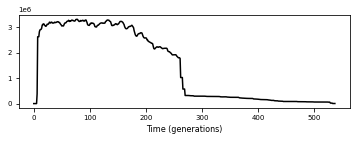

In [160]:
from scripts.draw_gone_Ne_results import draw_Ne_result
draw_Ne_result("outputs/gone_analysis/Output_Ne_example")

However, script could be run from command line:

In [157]:
%%bash
python scripts/draw_gone_Ne_results.py outputs/gone_analysis/Output_Ne_example

Figure(500x200)
